*Latex Commands*
$$\newcommand{\bp}{\begin{pmatrix}}
\newcommand{\ep}{\end{pmatrix}}$$

In [1]:
%%html
<style>
    .inline {color : blue;
    }
    
    .top-ref {float : right;
    }
       
    .dropdown {
        position: relative;
        background-color: inherit;
        color: blue;
        display: flex;
    }
    
    ul.dropdown ul{
      list-style-type: none;
      padding: 0;
      margin: 0;
    }
    ul.dropdown ul ul{
      list-style-type: none;
      padding: 0;
      margin: 0;
    }
    
    .dropbtn {
      border: none;
      border-radius: 10px;
      outline: none;
      color: blue;
      padding: 14px 16px;
      background-color: #f0f0f0;
      font-family: inherit; /* Important for vertical align on mobile phones */
      margin: 0; /* Important for vertical align on mobile phones */
      transition: .15;
    }

    .dropdown ul{
      display: none;
      position: absolute;
      background-color: white;
      min-width: 160px;
      box-shadow: 0px 8px 16px 0px rgba(0,0,0,0.2);
      z-index: 1;
    }
    
    .dropdown1 ul{
      display: none;
    }
    
    .dropdown2 ul{
      display: none
    }
    
    .dropbtn:hover{
        background-color: grey;
        shadow: .15px .15px;
    }
    
    .dropdown li:hover{
        background-color: grey;
    }
    .dropbtn:hover .dropdown1{
        display: block;      
        position: absolute;
        padding: 0;
    }
    
    .dropdown2:hover .dropdown2{
      position: absolute;
      padding: 0;
      display: inline-block;
    }
    

    
</style>

In [2]:
from abc import ABCMeta
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import warnings

np.random.seed(0)
plt.style.use('classic')
warnings.filterwarnings('ignore')

# Numerical Methods for Homogenization


<ul class="dropdown">
    <button class="dropbtn"> <a href="#Numerical-Methods-for-Homogenization"> Introduction</a>
    <ul class="dropdown1">
        <div class="dropdown2">
            <li>
                <a href="#Finite-Difference-Schemes">Finite Difference Schemes</a>
            </li>
            <ul class="dropdown2">
                <li><a href="#Finite-Difference-Functions">Finite Difference Functions</a></li>
                <li><a href="#Finite-Difference-Matrices">Finite Difference Matrices</a></li>
                <li><a href="#PDE-Solvers">PDE Solvers</a></li>
            </ul>
        </div>        <div class="dropdown2">
            <li>
                <a href="#Design-Operations"> Design Operations </a>
            </li>
            <ul class="dropdown2">
                <li><a href="#Design-Laminates">Design Laminates</a></li>
                <li><a href="#Design-Matrix">Design Matrix</a></li>
                <li><a href="#Composite-Derivative-">Composite Derivative</a></li>
                <li><a href="#Derivative-wrt-Eigen-Vectors">Derivative wrt Eigen Vectors</a></li>
                <li><a href="#Derivative-wrt-Eigen-Directions">Derivative wrt Eigen Directions</a></li>
            </ul>
        </div>
        <li><a href="#Projected-Gradient-Algorithm">Projected Gradient Algorithm</a></li>
    </ul>
    </button>
    <button class="dropbtn"> <a href="#Heat-Lens">Heat Lens</a>
        <ul class="dropdown1">
            <li> <a href="#Heat-Lens-Class">Heat Lens Class</a></li>
            <li> <a href="#Robust-Heat-Lens">Robust Heat Lens</a></li>
            <div class="dropdown2">
                <li><a href="#Heat-Lens-Examples">Examples</a></li>
                <ul class="dropdown2">
                    <li>
                        <a href="#Example-1">Example 1</a>
                    </li>
                    <li>
                        <a href="#Example-2">Example 2</a>
                    </li>
                    <li>
                        <a href="#Example-3">Example 3</a>
                    </li>
                </ul>
            </div>
        </ul>
    </button>
    <button class="dropbtn"> <a href="#Optimal-Transportation">Optimal Transport</a>
      <ul class="dropdown1">
        <div class="dropdown2">
            <li>
                <a href="#Transport-Examples">Examples</a>
            </li>
            <ul class="dropdown2">
                <li><a href="#Example-1:-Split-Plates">Split Plates</a></li>
                <li><a href="#Example-2:-Separated-Plates">Separated Plates</a></li>
            </ul>
            </div>
        </ul>
    </button>
</ul>


**Homogenization Principles**

The class of problems to consider are the following. For some energy functional $J(\lambda \nabla u)$, maximize $J$ with respect to $\lambda$ and $u$ where $\lambda \nabla u$ satisfy the following constraints.

$$\begin{align*}
\nabla \cdot \left(\lambda \nabla u\right) &= f\\
\frac{\partial}{\partial n} \left(\lambda \nabla u\right)&=g,\quad x\in\partial\Omega_N\\
u&=h,\quad x\in\partial\Omega_D
\end{align*}$$

We assume that $f,g,h$ are provided and that $g$ denotes Neumann boundary data, and $h$ denotes Dirichlet boundary data.

Direct solutions to the problem above exhibit oscillating solutions for $\lambda$. To avoid this, the rank-one laminate $A^*$ is introduced for $\lambda$.

$$\begin{align*}
\nabla \cdot \left(A^* \nabla u\right) &= f\\
\frac{\partial}{\partial n} \left(A^* \nabla u\right)&=g,\quad x\in\partial\Omega_N\\
u&=h,\quad x\in\partial\Omega_D
\end{align*}$$



## Finite Difference Schemes

In order to solve the above PDE equations it will require callling several different differentials involving $A$ and $u$ possibly simultaneously. In the following section we define two finite difference classes. The first class is a functin evaluation class for fast computation given input vector $u$. The second class is a matrix generation class for solving the linear PDE equation. The final class is a PDE solver that solves the linear PDE equation given the boundary conditions.

Each of these methods are centered differences with first order Neumann boundaries.

### Finite Difference Functions

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

The following class is for rapid evaluation of the PDEs given input vector v. It offers several methods computing the following
* `grad(v)`
    
    $\nabla v$ : centered difference first order Neumann boundary
* `div(v)`

    $\nabla\cdot v$ : centered differences first order Neumann boundary
* `divGrad(v)`
    
    $\nabla\cdot\left(\nabla v\right)$ : calls `div(grad(v))`
* `Agrad(v)`
    
    $A^*\nabla v$ : centered difference first order Neumann boundary
* `divAgrad(v)`
    
    $\nabla\cdot\left(A^*\nabla v\right)$ : calls `div(Agrad(v))`

In [3]:
class FiniteDifferenceFunctions(metaclass=ABCMeta):
    def __init__(self,m,n,dx,dy,A=None):
        self.A = A
        self.m = m
        self.n = n
        self.dx = dx
        self.dy = dy
    def grad(self,v):
        v = v.reshape(self.m,self.n)
        return np.array(np.gradient(v,self.dx,self.dy,axis=(1,0),edge_order=1))#[::-1]
    def div(self,v):
        v = v.reshape(2,self.m,self.n)
        return np.array(np.gradient(v[0],self.dx,axis=(1),edge_order=1))+np.array(np.gradient(v[1],self.dy,axis=(0),edge_order=1))
    def divGrad(self,v):
        v = v.reshape(self.m,self.n)
        return self.div(self.grad(v))
    def Agrad(self,v):
        assert (self.A is not None)
        v = v.reshape(self.m,self.n)
        mult = lambda A,v: np.einsum('ijkl,jkl->ikl',A,v)
        return mult(self.A,self.grad(v))
    def divAgrad(self,v):
        assert (self.A is not None)
        v = v.reshape(self.m,self.n)
        mult = lambda A,v: np.einsum('ijkl,jkl->ikl',A,v)
        return self.div(mult(self.A,self.grad(v)))

### Finite Difference Matrices

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

The following class is for generating the linear matrix for the ODE in order to solve $Av=f$. It involves the same methods as the above class however, it does not evaluate the vector $v$.

In [4]:
class FiniteDifferenceMatrices(metaclass=ABCMeta):
    def __init__(self,m,n,dx,dy,A=None):
        self.A = A
        self.m = m
        self.n = n
        self.dx = dx
        self.dy = dy
    def grad(self):
        n,m = self.n,self.m
        #X-MAT
        x_diag = np.diag(([-1]+[0]*(m-2)+[1])*(n),0)
        x_supdiag = np.diag(([1]+[.5]*(m-2)+[0])*(n-1)+([1]+[.5]*(m-2)),1)
        x_subdiag = np.diag(([-.5]*(m-2)+[-1]+[0])*(n-1)+([-.5]*(m-2)+[-1]),-1)
        x_mtrx = x_subdiag + x_diag + x_supdiag
        #Y-MAT
        y_diag = np.diag([-1]*m+[0]*m*(n-2)+[1]*m,0)
        y_supdiag = np.diag([1]*m+[.5]*m*(n-2),m)
        y_subdiag = np.diag([-.5]*m*(n-2)+[-1]*m,-m)
        y_mtrx = y_subdiag + y_diag + y_supdiag
        return np.array([x_mtrx/self.dx,y_mtrx/self.dy])
    def div(self):
        return np.moveaxis(self.grad(),0,-1)
    def divGrad(self):
        return np.tensordot(self.div(),self.grad(),axes=([2,1],[0,1]))
    def Agrad(self):
        assert (self.A is not None)
        A = self.A.reshape([2,2,self.m*self.n])
        mult = lambda A,v: np.einsum('ijk,jkl->ikl',A,v)
        return mult(A,self.grad())
    def divAgrad(self):
        assert (self.A is not None)
        A = self.A.reshape([2,2,self.m*self.n])
        mult = lambda A,v: np.einsum('ijk,jkl->ikl',A,v)
        return np.tensordot(self.div(),mult(A,self.grad()),axes=([2,1],[0,1]))

### PDE Solvers

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

The following PDE solver sets up the boundary conditions and solves the linear equation $Ax=b$ for the PDE equation with the given boundary data. Importantly the boundary data must be specified for the entire boundary and cannot be over constrained.

In [5]:
class PDESolver(metaclass=ABCMeta):
    def __init__(self,m,n,fdm,interior,dirichlet_bc,dirichlet_loc,neumann_xbc,neumann_xloc,neumann_ybc,neumann_yloc):
        self.domain_shape = (m,n)
        self.domain_len = m*n
        self.fdm = fdm
        assert np.array_equal(interior+dirichlet_loc+neumann_xloc+neumann_yloc,np.ones(neumann_yloc.shape)), "Not equivalent to ones: {}".format(np.where(interior+dirichlet_loc+neumann_xloc+neumann_yloc-np.ones(neumann_yloc.shape)!=0))
        self.interior = np.diag(interior.reshape(self.domain_len))
        self.dirichlet_bc = dirichlet_bc.reshape(self.domain_len)
        self.dirichlet_loc = np.diag(dirichlet_loc.reshape(self.domain_len))
        self.neumann_xbc = neumann_xbc.reshape(self.domain_len)
        self.neumann_xloc = np.diag(neumann_xloc.reshape(self.domain_len))
        self.neumann_ybc = neumann_ybc.reshape(self.domain_len)
        self.neumann_yloc = np.diag(neumann_yloc.reshape(self.domain_len))
    def divAgrad(self):
        pde_mtrx = (self.interior@self.fdm.divAgrad()+self.neumann_xloc@(self.fdm.Agrad()[0])+self.neumann_yloc@(self.fdm.Agrad()[1])+self.dirichlet_loc)
        return np.linalg.solve(pde_mtrx,self.neumann_xbc+self.neumann_ybc+self.dirichlet_bc)
    def MdivAgrad(self):
        pde_mtrx = (self.interior@-self.fdm.divAgrad()+self.neumann_xloc@(self.fdm.Agrad()[0])+self.neumann_yloc@(self.fdm.Agrad()[1])+self.dirichlet_loc)
        return np.linalg.solve(pde_mtrx,self.neumann_xbc+self.neumann_ybc+self.dirichlet_bc)
    def divGrad(self):
            pde_mtrx = (self.interior@self.fdm.divGrad()+self.neumann_xloc@(self.fdm.grad()[0])+self.neumann_yloc@(self.fdm.grad()[1])+self.dirichlet_loc)
            return np.linalg.solve(pde_mtrx,self.neumann_xbc+self.neumann_ybc+self.dirichlet_bc)
    def MdivGrad(self):
            pde_mtrx = (self.interior@-self.fdm.divGrad()+self.neumann_xloc@(self.fdm.grad()[0])+self.neumann_yloc@(self.fdm.grad()[1])+self.dirichlet_loc)
            return np.linalg.solve(pde_mtrx,self.neumann_xbc+self.neumann_ybc+self.dirichlet_bc)

## Design Operations

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

### Design Laminates
$$\begin{align*}
\lambda_+ &= \alpha\theta+\beta(1-\theta)\\[2ex]
\lambda_- &= \bigg(\frac{\theta}{\alpha} + \frac{1-\theta}{\beta}\bigg)^{-1}
\end{align*}$$

In [6]:
def genLam(theta,shape,alpha=1,beta=.5):
    lamPlus=alpha*theta+beta*(np.ones(shape)-theta)
    lamMinus=np.ma.power(theta/alpha+(np.ones(shape)-theta)/beta,-1)
    return lamPlus,lamMinus

### Design Matrix

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>


$$\begin{align*}
A^* &= \begin{pmatrix} \cos(\phi) & \sin(\phi)\\ -\sin(\phi) & \cos(\phi)\end{pmatrix}
\begin{pmatrix} \lambda_+ & 0\\ 0 & \lambda_-\end{pmatrix}
\begin{pmatrix} \cos(\phi) & -\sin(\phi)\\ \sin(\phi) & \cos(\phi)\end{pmatrix}\\[2ex]
&=\begin{pmatrix}
\lambda_+\cos^2(\phi)+\lambda_-\sin^2(\phi) & (-\lambda_++\lambda_-)\sin(\phi)\cos(\phi)
\\ (-\lambda_++\lambda_-)\sin(\phi)\cos(\phi) & \lambda_+\sin^2(\phi)+\lambda_-\cos^2(\phi)
\end{pmatrix}\end{align*}$$

In [7]:
def genA(theta,phi,shape,alpha=1,beta=.1):
    A = np.zeros([2,2]+shape)
    lamPlus,lamMinus=genLam(theta,shape,alpha,beta)
    #BLOCK A
    for i in range(shape[0]):
        for j in range(shape[1]):
            A1=lamPlus[i,j]*np.cos(phi[i,j])**2+lamMinus[i,j]*np.sin(phi[i,j])**2
            A2=(lamPlus[i,j]+lamMinus[i,j])*np.sin(phi[i,j])*np.cos(phi[i,j])
            A3=lamPlus[i,j]*np.sin(phi[i,j])**2+lamMinus[i,j]*np.cos(phi[i,j])**2
            A[...,i,j]=np.array([[A1,A2],[A2,A3]])
    return A
#TODO: print A here

### Composite Derivative

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

$$\begin{align*}
\frac{\partial\lambda_-}{\partial\theta} &= -\bigg(\frac{1}{\alpha} - \frac{1}{\beta}\bigg)\bigg(\frac{\theta}{\alpha} + \frac{1-\theta}{\beta}\bigg)^{-2}\\
\frac{\partial\lambda_+}{\partial\theta} &= \alpha-\beta\\
\end{align*}$$

In [8]:
def lam_theta(theta,shape,alpha=1,beta=.5):
    n,m=shape
    lamPlus_theta=alpha-beta
    lamMinus_theta=-(1/alpha-1/beta)*((thetaK/alpha+(1-thetaK)/beta)**(-2))
    return lamPlus_theta,lamMinus_theta

### Derivative wrt Eigen Vectors

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

$$\begin{align*}
\frac{\partial A}{\partial\theta} &= \begin{pmatrix} \cos(\phi) & \sin(\phi)\\ -\sin(\phi) & \cos(\phi)\end{pmatrix}
\begin{pmatrix} \frac{\partial\lambda_+}{\partial\theta} & 0\\ 0 & \frac{\partial\lambda_-}{\partial\theta}\end{pmatrix}
\begin{pmatrix} \cos(\phi) & -\sin(\phi)\\ \sin(\phi) & \cos(\phi)\end{pmatrix}\\
\end{align*}$$

In [9]:
def A_theta(thetaK,phiK,alpha=1,beta=.1):
    lamPlus_theta=alpha-beta
    lamMinus_theta=-(1/alpha-1/beta)*((thetaK/alpha+(1-thetaK)/beta)**(-2))

    A1=lamPlus_theta*np.cos(phiK)**2+lamMinus_theta*np.sin(phiK)**2
    A2=(-lamPlus_theta+lamMinus_theta)*np.sin(phiK)*np.cos(phiK)
    A3=lamPlus_theta*np.sin(phiK)**2+lamMinus_theta*np.cos(phiK)**2
  
    A_theta=np.array([[A1,A2],[A2,A3]])
    return A_theta

### Derivative wrt Eigen Directions

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

$$\begin{align*}
\frac{\partial A}{\partial\phi} &= \begin{pmatrix} (-\lambda_++\lambda_-)(2\cos(\phi)\sin(\phi)) & (-\lambda_++\lambda_-)(\cos^2(\phi)-\sin^2(\phi))
\\ (-\lambda_++\lambda_-)(\cos^2(\phi)-\sin^2(\phi)) & (\lambda_+-\lambda_-)(2\cos(\phi)\sin(\phi)) \end{pmatrix}\end{align*}$$

In [10]:
def A_phi(thetaK,phiK,alpha=1,beta=.1):
    lamPlus=np.ma.power(thetaK/alpha+(1-thetaK)/beta,-1)
    lamMinus=alpha*thetaK-beta*(1-thetaK)

    A1=(-lamPlus+lamMinus)*2*np.sin(phiK)*np.cos(phiK)
    A2=(-lamPlus+lamMinus)*(np.cos(phiK)**2-np.sin(phiK)**2)
    A3=(lamPlus-lamMinus)*2*np.sin(phiK)*np.cos(phiK)

    A_phi=np.array([[A1,A2],[A2,A3]])
    return A_phi

## Projected Gradient Algorithm

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

* Solve $u$

$$\begin{align*}
-\nabla \cdot (A^* \nabla u) &= 0\\
\frac{d}{dn}(A^*\nabla u)\vert_{\Gamma_1} &= 1\\
\frac{d}{dn}(A^*\nabla u)\vert_{\Gamma_2} &= 0\\
u\vert_{\Gamma_3}&=0
\end{align*}$$

* Solve $p$

$$\begin{align*}
\nabla \cdot (A^* \nabla p) &= 0\\
\frac{d}{dn}(A^*\nabla p)\vert_{\Gamma_1} &= 0\\
\frac{d}{dn}(A^*\nabla p)\vert_{\Gamma_2} &= 0\\
p\vert_{\Gamma_3}&=\rho
\end{align*}$$


* Update $\theta$
$$\begin{align*}
\theta_{k+1} = \max \bigg( 0,\min \bigg(1,\theta_k-t_k\bigg(\ell_k+\frac{\partial A^*}{\partial \theta}(\theta_k,\phi_k)\nabla u_k\cdot \nabla p_k\bigg) \bigg)\bigg)\end{align*}$$

* Update $\phi$
$$\begin{align*}
\phi_{k+1} = \phi_k-t_k\frac{\partial A^*}{\partial \theta}(\theta_k,\phi_k)\nabla u_k\cdot \nabla p_k\end{align*}$$

## Heat Lens

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

**Extended Functional**

$$\begin{align*}
J = \int_{\Gamma_3}\rho(\Gamma)q\cdot n(\Gamma)d\Gamma + \iint_S \mu \nabla\cdot (D_0\nabla T)ds
\end{align*}$$

**Primal**

$$\begin{align*}
-\nabla \cdot (A^* \nabla u) &= 0\\
\frac{d}{dn}(A^*\nabla u)\vert_{\Gamma_1} &= 1\\
\frac{d}{dn}(A^*\nabla u)\vert_{\Gamma_2} &= 0\\
u\vert_{\Gamma_3}&=0
\end{align*}$$

**Dual**

$$\begin{align*}
\nabla \cdot (A^* \nabla p) &= 0\\
\frac{d}{dn}(A^*\nabla p)\vert_{\Gamma_1} &= 0\\
\frac{d}{dn}(A^*\nabla p)\vert_{\Gamma_2} &= 0\\
p\vert_{\Gamma_3}&=\rho
\end{align*}$$

### Heat Lens Class

In [11]:
class heatLens():
    def __init__(self,x,y,options={}):
        #DOMAIN
        self.m=len(x)
        self.n=len(y)
        self.dx = 1/(m+1)
        self.dy = 1/(n+1)
        self.domain_len = self.m*self.n
        self.domain_shape = (self.m,self.n)
        self.xx, self.yy = np.meshgrid(x,y)
        self.zeros = np.zeros(self.domain_shape)
        self.ones = np.ones(self.domain_shape)
        #BOUNDARIES
        self.x_loc = np.zeros(self.domain_shape);
        self.x_loc[0,:]=np.ones(m);self.x_loc[-1,:]=np.ones(m);
        self.y_loc = np.zeros(self.domain_shape);
        self.y_loc[:,0]=np.ones(n);self.y_loc[:,-1]=np.ones(n)
        self.interior = np.ones(self.domain_shape);
        self.interior[0,:]=np.zeros(m);self.interior[-1,:]=np.zeros(m);
        self.interior[:,0]=np.zeros(n);self.interior[:,-1]=np.zeros(n)
        #OPTIONS
        self.options=options
        self.check_options()
        #PRIMAL BOUNDARY DATA
        self.gamma = self.options['gamma']
        self.gamma_loc = self.options['gamma_loc']
        self.rho_x = self.options['rho_x']
        self.rho_xloc = self.options['rho_xloc']
        self.rho_y = self.options['rho_y']
        self.rho_yloc = self.options['rho_yloc']
        #INITIALIZE
        self.u=np.zeros(self.domain_len)
        self.p=np.zeros(self.domain_len)
        self.theta=np.ones(self.domain_shape)#np.random.rand(self.domain_len).reshape(self.domain_shape)
        self.phi=np.zeros(self.domain_shape)#np.pi*np.random.rand(self.domain_len).reshape(self.domain_shape)#
        self.lv=self.options['lv']
        self.vol=self.options['volume']
        #DIFFERENCES
        self.fdf = FiniteDifferenceFunctions(self.m,self.n,self.dx,self.dy)
        self.fdm = FiniteDifferenceMatrices(self.m,self.n,self.dx,self.dy)
        self.contract = lambda a,b,c : np.einsum('ijk,ijk->jk',b,
                        np.einsum('ijkl,jkl->ikl',a,c))
        self.energies = []
        #TODO: history of volume fraction
        self.tolerance = self.options['tol']

    def iterate(self,k):
        pbar = tqdm(range(k))
        for _ in pbar:
            if (len(self.energies)>2) and (abs(self.energies[-1]-self.energies[-2])<self.tolerance):
                break
            self._iter()
            pbar.set_description(desc=str(self.lv))

    def _iter(self):
        #INITIALIZE
        alpha=self.options['alpha']
        beta=self.options['beta']
        tk=self.options['tk']
        #COEFFICIENTS
        A=genA(self.theta,self.phi,[self.m,self.n],alpha=alpha,beta=beta)
        self.fdm.A = A
        self.fdf.A = A
        #PRIMAL SOLUTION VIA RESIDUAL
        primal_dirichlet_loc = self.gamma_loc
        primal_neumann_xloc = self.rho_xloc
        primal_neumann_yloc = self.rho_yloc
        primal_neumann_xbc = self.rho_x
        primal_neumann_ybc = self.rho_y
        primal_dirichlet_bc = np.zeros(self.domain_shape)
        primal_pde = PDESolver(self.m,self.n,self.fdm, self.interior,
                               primal_dirichlet_bc,primal_dirichlet_loc,
                               primal_neumann_xbc, primal_neumann_xloc,
                               primal_neumann_ybc, primal_neumann_yloc)
        u = primal_pde.MdivAgrad()
        Du = self.fdf.grad(u)     
        #ADJOINT SOLUTION VIA RESIDUAL
        adjoint_dirichlet_loc = self.gamma_loc
        adjoint_neumann_xloc = self.rho_xloc
        adjoint_neumann_yloc = self.rho_yloc
        adjoint_neumann_xbc = np.zeros(self.domain_shape)
        adjoint_neumann_ybc = np.zeros(self.domain_shape)
        adjoint_dirichlet_bc = self.gamma
        adjoint_pde = PDESolver(self.m,self.n,self.fdm, self.interior,
                               adjoint_dirichlet_bc,adjoint_dirichlet_loc,
                               adjoint_neumann_xbc, adjoint_neumann_xloc,
                               adjoint_neumann_ybc, adjoint_neumann_yloc)
        p = adjoint_pde.MdivAgrad()
        Dp = self.fdf.grad(p) 
        for i in range(self.m):
            for j in range(self.n):
                A_t=A_theta(self.theta[i,j],self.phi[i,j],alpha=alpha,beta=beta)
                rhs=self.theta[i,j]+tk*(self.lv+A_t@Du[:,i,j]@Dp[:,i,j])
                self.theta[i,j]=max([0,min([1,rhs])])
        for i in range(self.m):
            for j in range(self.n):
                A_p=A_phi(self.theta[i,j],self.phi[i,j],alpha=alpha,beta=beta)
                self.phi[i,j]=self.phi[i,j]+tk*(A_p@Du[:,i,j]@Dp[:,i,j])
        self.options['tk'] = .975*tk
        #SOLUTION DATA
        self.u = u
        self.p = p
        self.Du = Du
        self.Dp = Dp
        self.ADu=self.fdf.Agrad(u)
        self.ADp=self.fdf.Agrad(p)
        self.sol=self.fdf.divAgrad(u)
        self.energy = np.sum(self.gamma*(-self.Du[0]*self.y_loc-self.Du[1]*self.x_loc))#+np.sum(p.reshape(self.domain_shape)*self.fdf.divAgrad(u))
        self.energies += [self.energy]
        self.theta_vol = np.sum(self.theta*(self.dx*self.dy))

    def check_options(self):
        assert ('gamma' in self.options) and ('gamma_loc' in self.options), 'No Dirichlet Conditions Provided.'
        assert ('rho_xloc' in self.options) or ('rho_yloc' in self.options), 'No Sources Provided.'
        if not('alpha' in self.options):
            self.options['alpha']=1
        if not('beta' in self.options):
            self.options['beta']=.1
        if not('tk' in self.options):
            self.options['tk']=.1
        if not('lv' in self.options):
            self.options['lv']=0
        if not('volume' in self.options):
            self.options['volume']=.5
        if not('tol' in self.options):
            self.options['tol']=.01

<mark>TODO</mark>: volume fraction histories (above)


<mark>TODO</mark>:non-symm currents - write down optimization problem (flux through bottom window should be equally portioned between windows).

(von-Neuamann theory: if corresponding component of solution is non-zero then solution should be value of the game)

Start with equivalent windows - then different flux amplitude with equivalent flux at the bottom boundary - then maybe move them

### Robust Heat Lens

In [12]:
class robustHeatLens():
    def __init__(self,x,y,options={}):
        #DOMAIN
        self.m=len(x)
        self.n=len(y)
        self.dx = 1/(m+1)
        self.dy = 1/(n+1)
        self.domain_len = self.m*self.n
        self.domain_shape = (self.m,self.n)
        self.xx, self.yy = np.meshgrid(x,y)
        self.zeros = np.zeros(self.domain_shape)
        self.ones = np.ones(self.domain_shape)
        #BOUNDARIES
        self.x_loc = np.zeros(self.domain_shape);
        self.x_loc[0,:]=np.ones(m);self.x_loc[-1,:]=np.ones(m);
        self.y_loc = np.zeros(self.domain_shape);
        self.y_loc[:,0]=np.ones(n);self.y_loc[:,-1]=np.ones(n)
        self.interior = np.ones(self.domain_shape);
        self.interior[0,:]=np.zeros(m);self.interior[-1,:]=np.zeros(m);
        self.interior[:,0]=np.zeros(n);self.interior[:,-1]=np.zeros(n)
        #OPTIONS
        self.options=options
        self.check_options()
        #PRIMAL BOUNDARY DATA
        self.lam = 1
        self.gamma = self.options['gamma']
        self.gamma_loc = self.options['gamma_loc']
        self.rho_x = self.options['rho_x']
        self.rho_xloc = self.options['rho_xloc']
        self.rho_y = self.options['rho_y']
        self.rho_yloc = self.options['rho_yloc']
        #SEPARATE FLUXES
        self.rho1_xloc = self.options['rho1_xloc']
        self.rho2_xloc = self.options['rho2_xloc']
        self.rho1_yloc = self.options['rho1_yloc']
        self.rho2_yloc = self.options['rho2_yloc']
        #INITIALIZE
        self.u=np.zeros(self.domain_len)
        self.p=np.zeros(self.domain_len)
        self.theta=np.ones(self.domain_shape)#np.random.rand(self.domain_len).reshape(self.domain_shape)
        self.phi=np.zeros(self.domain_shape)#np.pi*np.random.rand(self.domain_len).reshape(self.domain_shape)#
        self.lv=self.options['lv']
        self.vol=self.options['volume']
        #DIFFERENCES
        self.fdf = FiniteDifferenceFunctions(self.m,self.n,self.dx,self.dy)
        self.fdm = FiniteDifferenceMatrices(self.m,self.n,self.dx,self.dy)
        self.contract = lambda a,b,c : np.einsum('ijk,ijk->jk',b,
                        np.einsum('ijkl,jkl->ikl',a,c))
        #ROBUST
        self.robust = self.options['robust']
        self.energies = []
        self.energies1 = []
        self.energies2 = []
        #TODO: history of volume fraction
        self.tolerance = self.options['tol']

    def iterate(self,k):
        pbar = tqdm(range(k))
        for _ in pbar:
            if (len(self.energies)>2) and (abs(self.energies[-1]-self.energies[-2])<self.tolerance):
                break
            self._iter()
            pbar.set_description(desc=str(self.lam))

    def _iter(self):
        #INITIALIZE
        alpha=self.options['alpha']
        beta=self.options['beta']
        tk=self.options['tk']
        #COEFFICIENTS
        A=genA(self.theta,self.phi,[self.m,self.n],alpha=alpha,beta=beta)
        self.fdm.A = A
        self.fdf.A = A
        #PRIMAL SOLUTION VIA RESIDUAL
        primal_dirichlet_loc = self.gamma_loc
        primal_neumann_xloc = self.rho_xloc
        primal_neumann_yloc = self.rho_yloc
        primal_neumann_xbc = self.rho_x
        primal_neumann_ybc = self.rho_y
        primal_dirichlet_bc = np.zeros(self.domain_shape)
        primal_pde = PDESolver(self.m,self.n,self.fdm, self.interior,
                               primal_dirichlet_bc,primal_dirichlet_loc,
                               primal_neumann_xbc, primal_neumann_xloc,
                               primal_neumann_ybc, primal_neumann_yloc)
        u = primal_pde.MdivAgrad()
        Du = self.fdf.grad(u)
        #ADJOINT SOLUTION VIA RESIDUAL
        adjoint_dirichlet_loc = self.gamma_loc
        adjoint_neumann_xloc = self.rho_xloc
        adjoint_neumann_yloc = self.rho_yloc
        adjoint_neumann_xbc = np.zeros(self.domain_shape)
        adjoint_neumann_ybc = np.zeros(self.domain_shape)
        adjoint_dirichlet_bc = self.gamma
        adjoint_pde = PDESolver(self.m,self.n,self.fdm, self.interior,
                               adjoint_dirichlet_bc,adjoint_dirichlet_loc,
                               adjoint_neumann_xbc, adjoint_neumann_xloc,
                               adjoint_neumann_ybc, adjoint_neumann_yloc)
        p = adjoint_pde.MdivAgrad()
        Dp = self.fdf.grad(p)
        #SEPARATE FLUXES
        primal_pde = PDESolver(self.m,self.n,self.fdm, self.interior,
                               primal_dirichlet_bc,primal_dirichlet_loc,
                               primal_neumann_xbc*self.rho1_xloc, primal_neumann_xloc,
                               primal_neumann_ybc*self.rho1_yloc, primal_neumann_yloc)
        u1 = primal_pde.MdivAgrad()
        Du1 = self.fdf.grad(u1)
        primal_pde = PDESolver(self.m,self.n,self.fdm, self.interior,
                               primal_dirichlet_bc,primal_dirichlet_loc,
                               primal_neumann_xbc*self.rho2_xloc, primal_neumann_xloc,
                               primal_neumann_ybc*self.rho2_yloc, primal_neumann_yloc)
        u2 = primal_pde.MdivAgrad()
        Du2 = self.fdf.grad(u2)
        energy1 = np.sum(self.gamma*(-Du1[0]*self.y_loc-Du1[1]*self.x_loc))#+np.sum(p.reshape(self.domain_shape)*self.fdf.divAgrad(u))
        energy2 = np.sum(self.gamma*(-Du2[0]*self.y_loc-Du2[1]*self.x_loc))#+np.sum(p.reshape(self.domain_shape)*self.fdf.divAgrad(u))
        if self.robust:
            self.lam = energy1/energy2
        self.rho_x = self.rho_x-self.rho_x*self.rho2_xloc+self.lam*self.rho_x*self.rho2_xloc
        self.rho_y = self.rho_y-self.rho_y*self.rho2_yloc+self.lam*self.rho_y*self.rho2_yloc
        for i in range(self.m):
            for j in range(self.n):
                A_t=A_theta(self.theta[i,j],self.phi[i,j],alpha=alpha,beta=beta)
                rhs=self.theta[i,j]+tk*(self.lv+A_t@Du[:,i,j]@Dp[:,i,j])
                self.theta[i,j]=max([0,min([1,rhs])])
        for i in range(self.m):
            for j in range(self.n):
                A_p=A_phi(self.theta[i,j],self.phi[i,j],alpha=alpha,beta=beta)
                self.phi[i,j]=self.phi[i,j]+tk*(A_p@Du[:,i,j]@Dp[:,i,j])
        self.options['tk'] = .975*tk
        #SOLUTION DATA
        self.u = u
        self.p = p
        self.Du = Du
        self.Dp = Dp
        self.ADu=self.fdf.Agrad(u)
        self.ADp=self.fdf.Agrad(p)
        self.sol=self.fdf.divAgrad(u)
        self.energy = np.sum(self.gamma*(-self.Du[0]*self.y_loc-self.Du[1]*self.x_loc))#+np.sum(p.reshape(self.domain_shape)*self.fdf.divAgrad(u))
        self.energies += [self.energy]
        self.energies1 += [energy1]
        self.energies2 += [energy2]
        self.theta_vol = np.sum(self.theta*(self.dx*self.dy))

    def check_options(self):
        assert ('gamma' in self.options) and ('gamma_loc' in self.options), 'No Dirichlet Conditions Provided.'
        assert ('rho_xloc' in self.options) or ('rho_yloc' in self.options), 'No Sources Provided.'
        assert ('rho1_xloc' in self.options) or ('rho1_yloc' in self.options), 'No Sources Provided.'
        assert ('rho2_xloc' in self.options) or ('rho2_yloc' in self.options), 'No Sources Provided.'
        if not('alpha' in self.options):
            self.options['alpha']=1
        if not('beta' in self.options):
            self.options['beta']=.1
        if not('tk' in self.options):
            self.options['tk']=.1
        if not('lv' in self.options):
            self.options['lv']=0
        if not('volume' in self.options):
            self.options['volume']=.5
        if not('tol' in self.options):
            self.options['tol']=.01
        if not('robust' in self.options):
            self.options['robust']=True

### Heat Lens Examples

#### Example 1

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

In this example we consider the first example from Cherkaev et al. of transfering from one boundary to a window on the opposite boundary with zero-flux side boundaries.

In [13]:
#GRID
L = 2
n,m=40,40
y=np.linspace(-L/2,L/2,n)
x=np.linspace(-L/2,L/2,m)
dx = L/(n+1)
dy = L/(m+1)
domain_len = n*m
domain_shape = (n,m)
xx,yy=np.meshgrid(x,y)

In [14]:
rho_x = np.zeros(domain_shape)
rho_y = np.zeros(domain_shape)
rho_y[-1,1:-1] = -np.ones(m-2)
rho_xloc = np.zeros(domain_shape)
rho_yloc = np.zeros(domain_shape)
rho_xloc[:,-1] = np.ones(n)
rho_xloc[:,0] = np.ones(n)
rho_yloc[-1,1:-1] = np.ones(n-2)
gamma_loc = np.zeros(domain_shape)
gamma_loc[0,1:-1] = np.ones(n-2)
gamma = np.zeros(domain_shape)
gamma[0,3*n//8:5*n//8]=np.ones(n//4)
options={'lv':0, 'volume':0, 'tk':.05,
         'gamma':gamma,'gamma_loc':gamma_loc,
         'rho_x':rho_x,'rho_xloc':rho_xloc,
         'rho_y':rho_y,'rho_yloc':rho_yloc}
prob = heatLens(x,y,options)

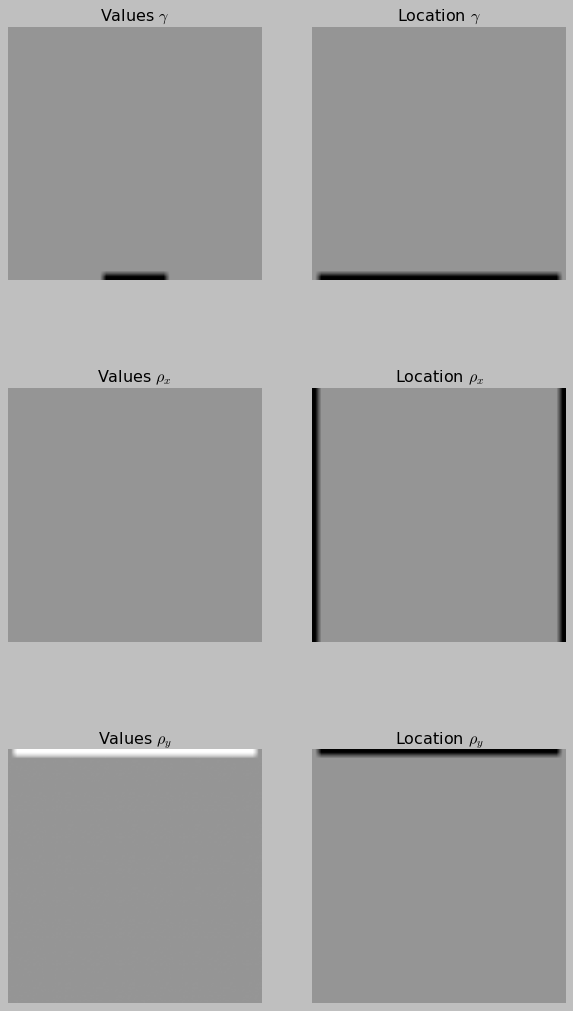

In [15]:
plt.figure(figsize=(9,16))
plt.subplot(321)
plt.title('Values $\\gamma$')
plt.imshow(prob.gamma[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(322)
plt.title('Location $\\gamma$')
plt.imshow(prob.gamma_loc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(323)
plt.title('Values $\\rho_x$')
plt.imshow(prob.rho_x[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(324)
plt.title('Location $\\rho_x$')
plt.imshow(prob.rho_xloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(325)
plt.title('Values $\\rho_y$')
plt.imshow(prob.rho_y[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(326)
plt.title('Location $\\rho_y$')
plt.imshow(prob.rho_yloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.show()

In [16]:
prob.iterate(100)

0:  19%|██████████████████████████████████████████████████████████▌                                                                                                                                                                                                                                                         | 19/100 [00:36<02:35,  1.91s/it]


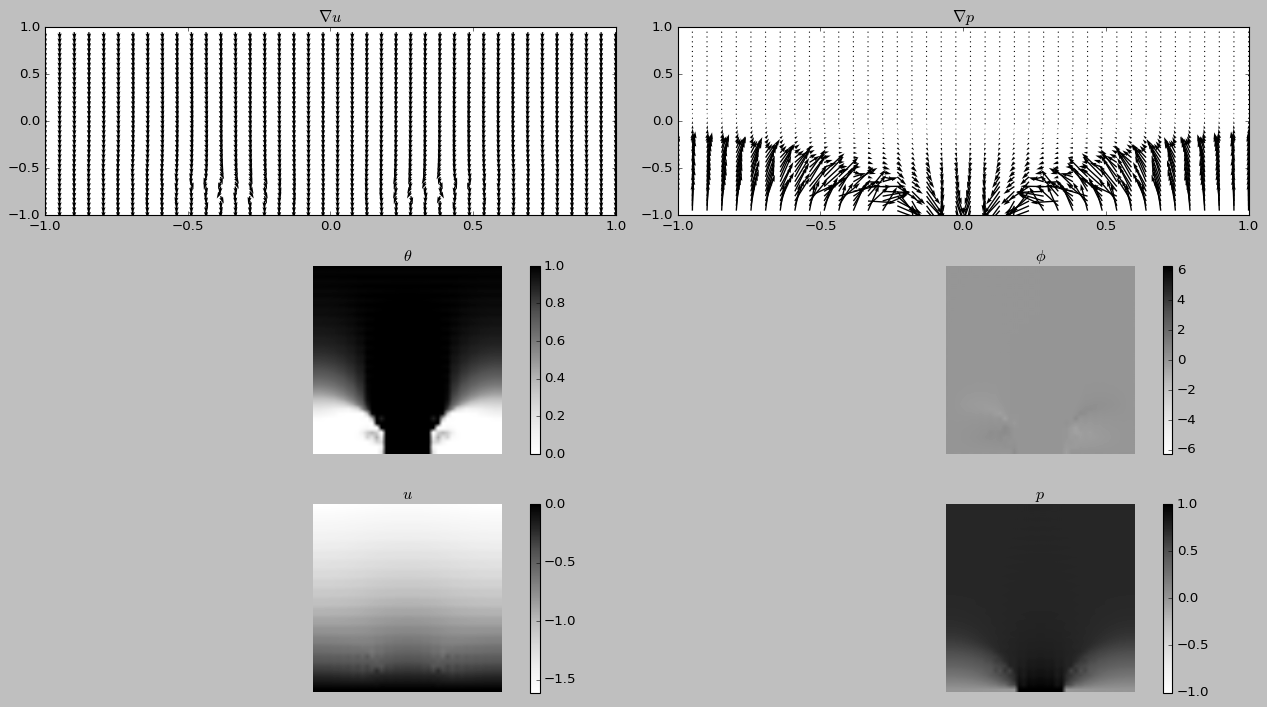

In [17]:
plt.figure(figsize=(16,9),tight_layout=True)
plt.subplot(321)
Du = np.divide(prob.Du,np.fmax(1,np.linalg.norm(prob.Du, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Du[0][1:-1],Du[1][1:-1])
plt.title('$\\nabla u$')
plt.subplot(322)
Dp = np.divide(prob.Dp,np.fmax(1,np.linalg.norm(prob.Dp, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Dp[0][1:-1],Dp[1][1:-1])
plt.title('$\\nabla p$')
plt.subplot(323)
plt.imshow(prob.theta.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=0,vmax=1)
plt.colorbar()
plt.title('$\\theta$')
plt.axis('off')
plt.subplot(324)
plt.imshow(prob.phi.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=-2*np.pi,vmax=2*np.pi)
plt.colorbar()
plt.title('$\\phi$')
plt.axis('off')
plt.subplot(325)
plt.imshow(prob.u.reshape(prob.domain_shape)[::-1],cmap='Greys')
plt.colorbar()
plt.title('$u$')
plt.axis('off')
plt.subplot(326)
plt.imshow(prob.p.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.colorbar()
plt.title('$p$')
plt.axis('off')
plt.show()

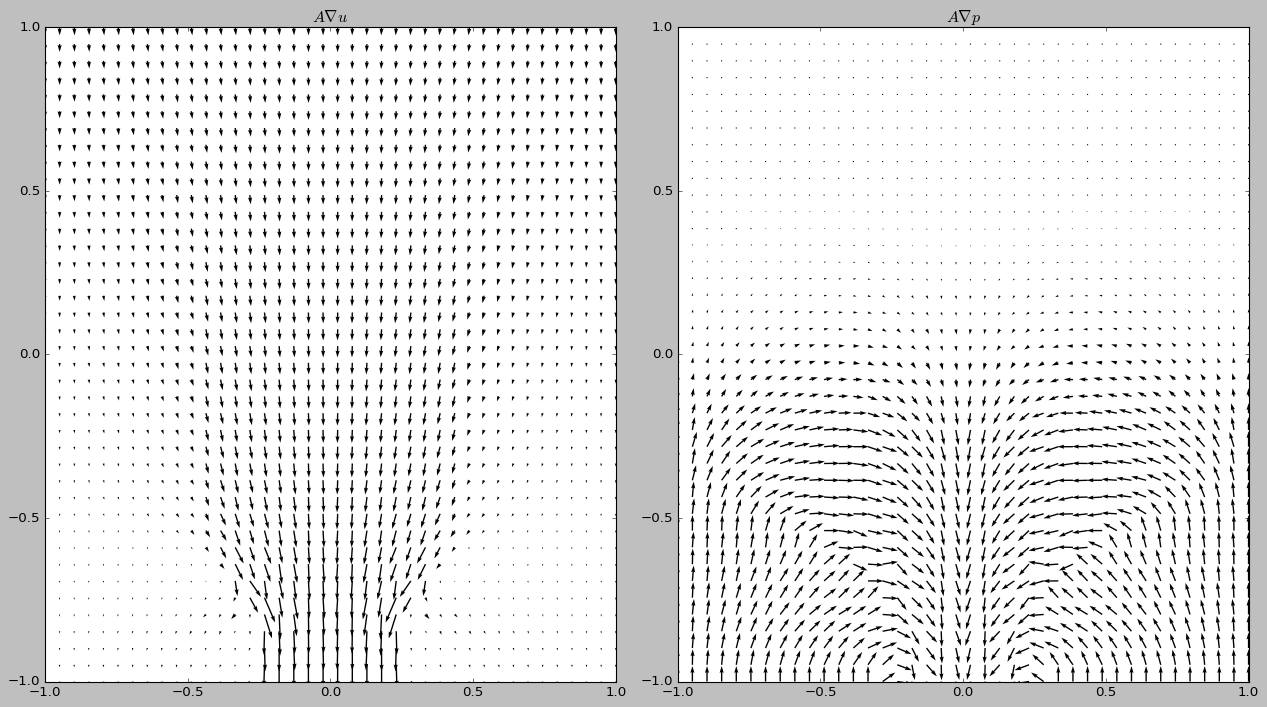

In [18]:
plt.figure(figsize=(16,9),tight_layout=True)
plt.subplot(121)
ADu = prob.ADu# np.divide(prob.ADu,np.fmax(.1,np.linalg.norm(prob.ADu, axis=0)))
plt.quiver(prob.xx,prob.yy,ADu[0],ADu[1])
plt.title('$A\\nabla u$')
plt.subplot(122)
plt.title('$A\\nabla p$')
ADp = np.divide(prob.ADp,np.fmax(.1, np.linalg.norm(prob.ADp, axis=0)))
plt.quiver(prob.xx,prob.yy,ADp[0],ADp[1])
plt.show()

In [19]:
print("Value of Energy Functional: {}".format(prob.energy))
print("Volume Fraction of Theta: {}".format(prob.theta_vol))

Value of Energy Functional: 28.04937703305938
Volume Fraction of Theta: 0.7376960111510596


Text(0.5, 1.0, 'Energy History')

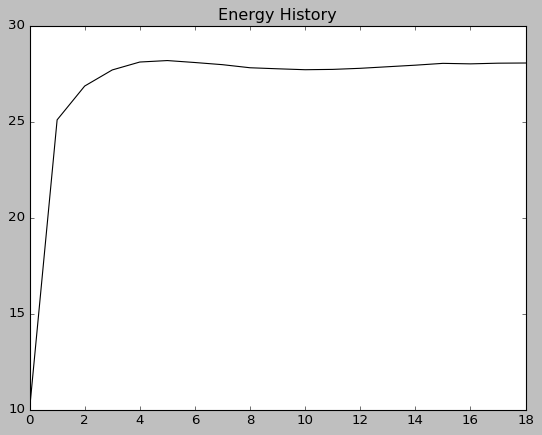

In [20]:
plt.plot(prob.energies,'k')
plt.title("Energy History")

#### Example 2

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

In this example we consider two symmetric sources on the side walls focused to the same narrow window as in the problem above.

In [21]:
#GRID
L = 2
n,m=40,40
y=np.linspace(-L/2,L/2,n)
x=np.linspace(-L/2,L/2,m)
dx = L/(n+1)
dy = L/(m+1)
domain_len = n*m
domain_shape = (n,m)
xx,yy=np.meshgrid(x,y)

In [22]:
rho_x = np.zeros(domain_shape)
rho_x[-m//4-1:-1,-1] = -np.ones(m//4)
rho_x[-m//4-1:-1,0] = np.ones(m//4)
rho_y = np.zeros(domain_shape)
rho_xloc = np.zeros(domain_shape)
rho_yloc = np.zeros(domain_shape)
rho_xloc[:,-1] = np.ones(n)
rho_xloc[:,0] = np.ones(n)
rho_yloc[-1,1:-1] = np.ones(n-2)
gamma_loc = np.zeros(domain_shape)
gamma_loc[0,1:-1] = np.ones(n-2)
gamma = np.zeros(domain_shape)
gamma[0,3*n//8:5*n//8]=np.ones(n//4)
options={'lv':0, 'volume':.75, 'tk':.1,
         'gamma':gamma,'gamma_loc':gamma_loc,
         'rho_x':rho_x,'rho_xloc':rho_xloc,
         'rho_y':rho_y,'rho_yloc':rho_yloc}
prob = heatLens(x,y,options)

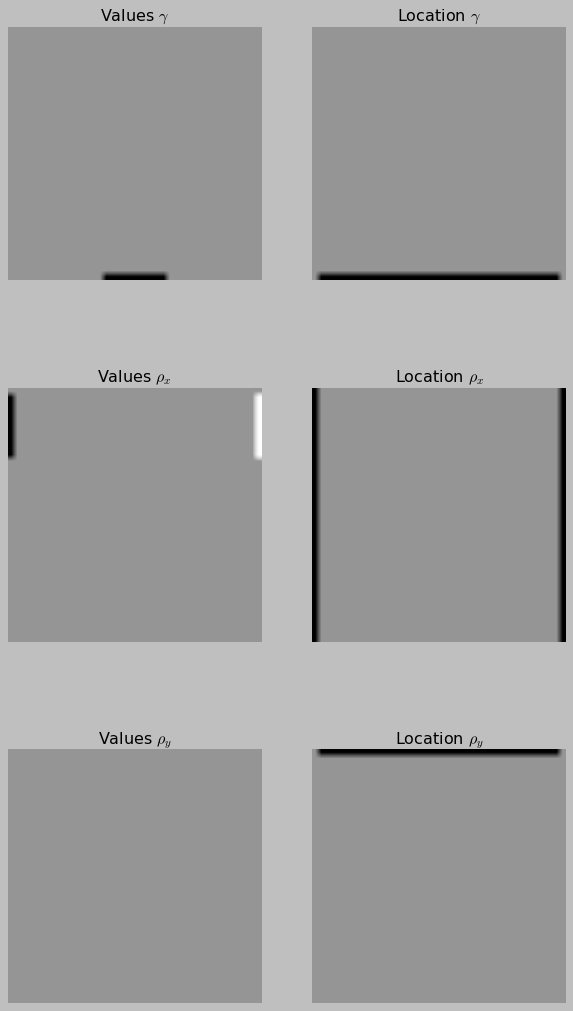

In [23]:
plt.figure(figsize=(9,16))
plt.subplot(321)
plt.title('Values $\\gamma$')
plt.imshow(prob.gamma[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(322)
plt.title('Location $\\gamma$')
plt.imshow(prob.gamma_loc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(323)
plt.title('Values $\\rho_x$')
plt.imshow(prob.rho_x[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(324)
plt.title('Location $\\rho_x$')
plt.imshow(prob.rho_xloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(325)
plt.title('Values $\\rho_y$')
plt.imshow(prob.rho_y[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(326)
plt.title('Location $\\rho_y$')
plt.imshow(prob.rho_yloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.show()

In [24]:
prob.iterate(100)

0:  10%|██████████████████████████████▊                                                                                                                                                                                                                                                                                     | 10/100 [00:21<03:14,  2.17s/it]


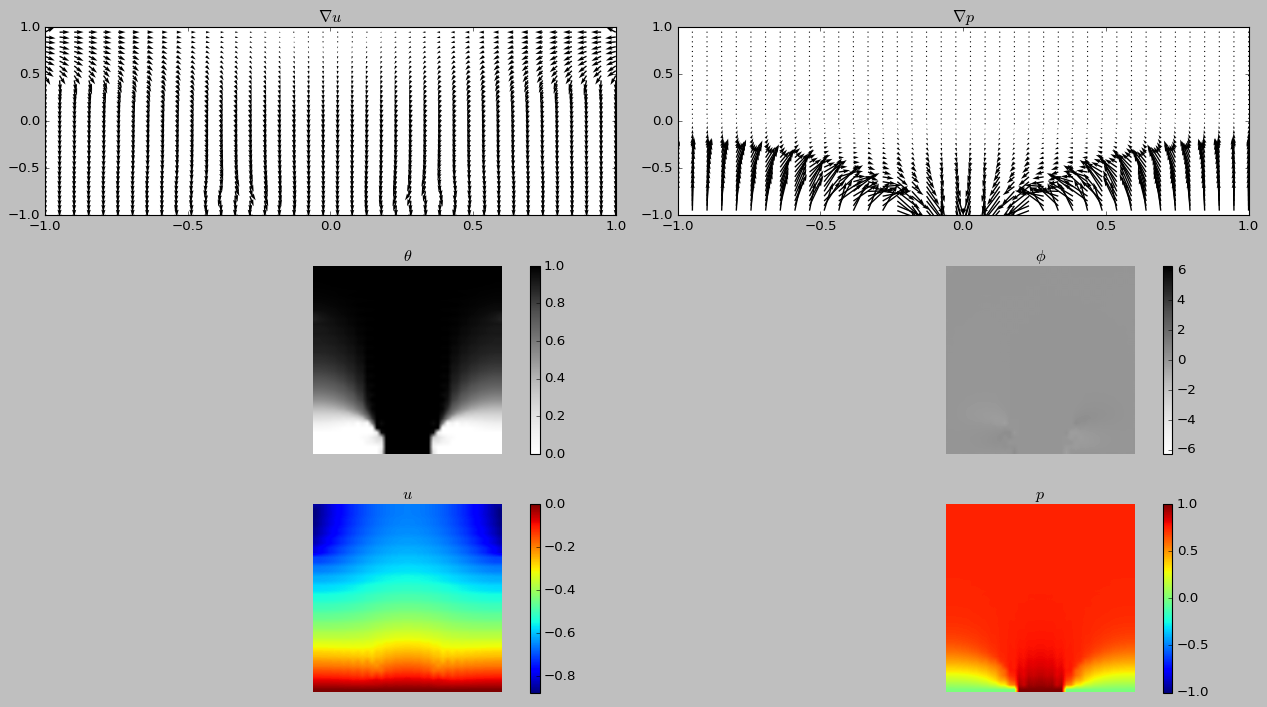

In [25]:
plt.figure(figsize=(16,9),tight_layout=True)
plt.subplot(321)
Du = np.divide(prob.Du,np.fmax(1,np.linalg.norm(prob.Du, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Du[0][1:-1],Du[1][1:-1])
plt.title('$\\nabla u$')
plt.subplot(322)
Dp = np.divide(prob.Dp,np.fmax(1,np.linalg.norm(prob.Dp, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Dp[0][1:-1],Dp[1][1:-1])
plt.title('$\\nabla p$')
plt.subplot(323)
plt.imshow(prob.theta.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=0,vmax=1)
plt.colorbar()
plt.title('$\\theta$')
plt.axis('off')
plt.subplot(324)
plt.imshow(prob.phi.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=-2*np.pi,vmax=2*np.pi)
plt.colorbar()
plt.title('$\\phi$')
plt.axis('off')
plt.subplot(325)
plt.imshow(prob.u.reshape(prob.domain_shape)[::-1])
plt.colorbar()
plt.title('$u$')
plt.axis('off')
plt.subplot(326)
plt.imshow(prob.p.reshape(prob.domain_shape)[::-1],vmin=-1,vmax=1)
plt.colorbar()
plt.title('$p$')
plt.axis('off')
plt.show()

In [26]:
print("Value of Energy Functional: {}".format(prob.energy))
print("Volume Fraction of Theta: {}".format(prob.theta_vol))

Value of Energy Functional: 14.58597842326649
Volume Fraction of Theta: 0.7669593661078634


Text(0.5, 1.0, 'Energy History')

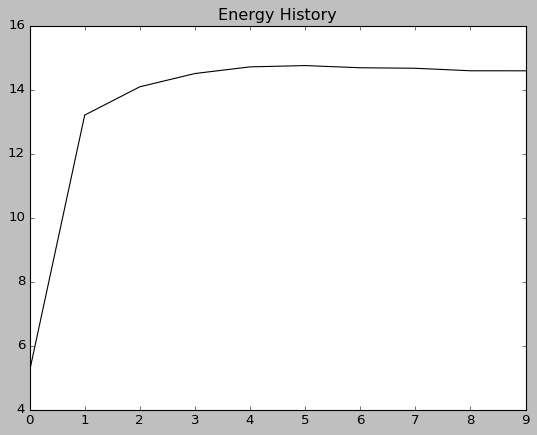

In [27]:
plt.plot(prob.energies,'k')
plt.title("Energy History")

#### Example 2 Robust

In [28]:
#GRID
L = 2
n,m=40,40
y=np.linspace(-L/2,L/2,n)
x=np.linspace(-L/2,L/2,m)
dx = L/(n+1)
dy = L/(m+1)
domain_len = n*m
domain_shape = (n,m)
xx,yy=np.meshgrid(x,y)

In [29]:
rho_x = np.zeros(domain_shape)
rho_x[-m//4-1:-1,-1] = -np.ones(m//4)
rho_x[-m//4-1:-1,0] = np.ones(m//4)
rho_y = np.zeros(domain_shape)
rho1_xloc = np.zeros(domain_shape)
rho2_xloc = np.zeros(domain_shape)
rho1_yloc = np.zeros(domain_shape)
rho2_yloc = np.zeros(domain_shape)
rho_yloc = np.zeros(domain_shape)
rho1_xloc[:,-1] = np.ones(n)
rho2_xloc[:,0] = np.ones(n)
rho_xloc = rho1_xloc+rho2_xloc
rho_yloc[-1,1:-1] = np.ones(n-2)
gamma_loc = np.zeros(domain_shape)
gamma_loc[0,1:-1] = np.ones(n-2)
gamma = np.zeros(domain_shape)
gamma[0,3*n//8:5*n//8]=np.ones(n//4)
options={'lv':0, 'volume':.75, 'tk':.1,
         'gamma':gamma,'gamma_loc':gamma_loc,
         'rho_x':rho_x,'rho_xloc':rho_xloc,'rho1_xloc':rho1_xloc,'rho2_xloc':rho2_xloc,
         'rho_y':rho_y,'rho_yloc':rho_yloc,'rho1_yloc':rho1_yloc,'rho2_yloc':rho2_yloc}
prob = robustHeatLens(x,y,options)

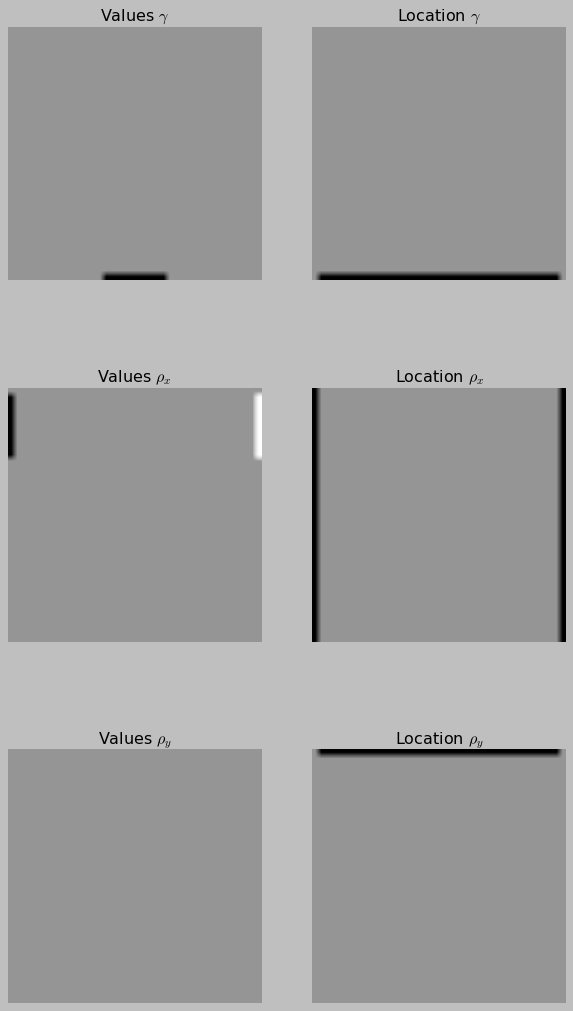

In [30]:
plt.figure(figsize=(9,16))
plt.subplot(321)
plt.title('Values $\\gamma$')
plt.imshow(prob.gamma[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(322)
plt.title('Location $\\gamma$')
plt.imshow(prob.gamma_loc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(323)
plt.title('Values $\\rho_x$')
plt.imshow(prob.rho_x[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(324)
plt.title('Location $\\rho_x$')
plt.imshow(prob.rho_xloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(325)
plt.title('Values $\\rho_y$')
plt.imshow(prob.rho_y[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(326)
plt.title('Location $\\rho_y$')
plt.imshow(prob.rho_yloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.show()

In [31]:
prob.iterate(100)

1.0000000000004938:  10%|█████████████████████████████                                                                                                                                                                                                                                                                      | 10/100 [00:34<05:08,  3.43s/it]


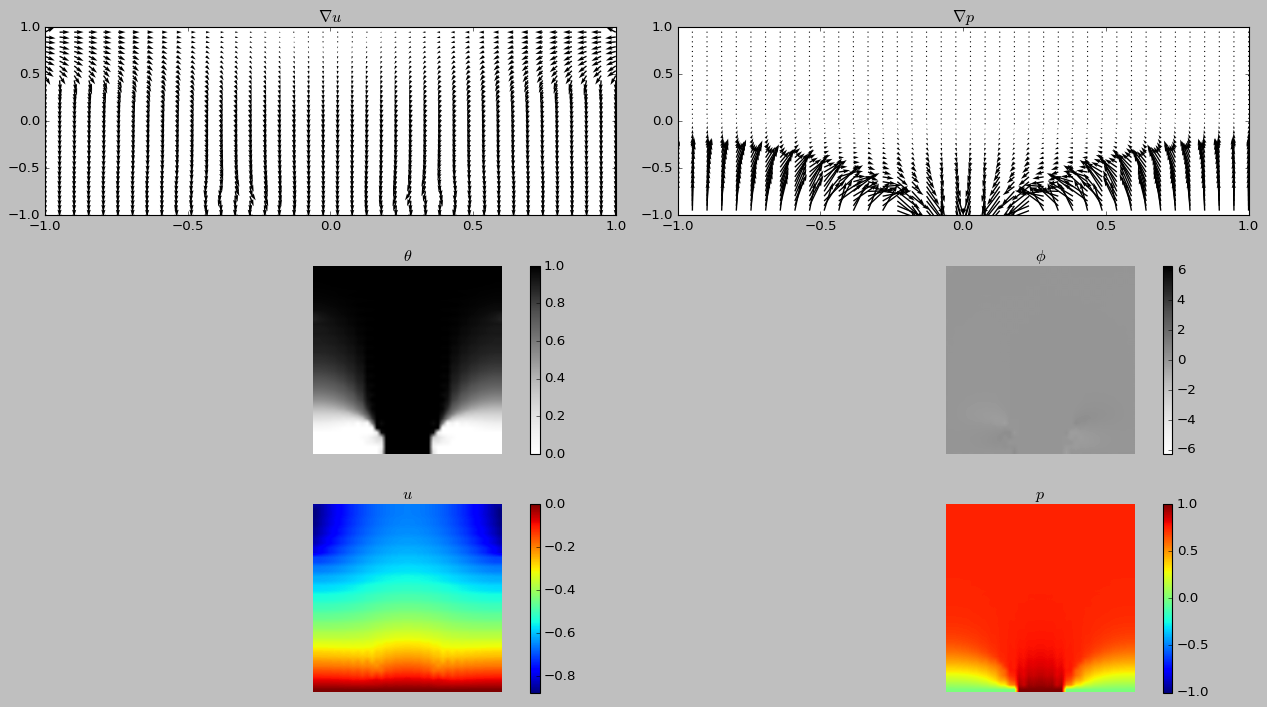

In [32]:
plt.figure(figsize=(16,9),tight_layout=True)
plt.subplot(321)
Du = np.divide(prob.Du,np.fmax(1,np.linalg.norm(prob.Du, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Du[0][1:-1],Du[1][1:-1])
plt.title('$\\nabla u$')
plt.subplot(322)
Dp = np.divide(prob.Dp,np.fmax(1,np.linalg.norm(prob.Dp, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Dp[0][1:-1],Dp[1][1:-1])
plt.title('$\\nabla p$')
plt.subplot(323)
plt.imshow(prob.theta.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=0,vmax=1)
plt.colorbar()
plt.title('$\\theta$')
plt.axis('off')
plt.subplot(324)
plt.imshow(prob.phi.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=-2*np.pi,vmax=2*np.pi)
plt.colorbar()
plt.title('$\\phi$')
plt.axis('off')
plt.subplot(325)
plt.imshow(prob.u.reshape(prob.domain_shape)[::-1])
plt.colorbar()
plt.title('$u$')
plt.axis('off')
plt.subplot(326)
plt.imshow(prob.p.reshape(prob.domain_shape)[::-1],vmin=-1,vmax=1)
plt.colorbar()
plt.title('$p$')
plt.axis('off')
plt.show()

In [33]:
print("Value of Energy Functional: {}".format(prob.energy))
print("Volume Fraction of Theta: {}".format(prob.theta_vol))

Value of Energy Functional: 14.585978423230996
Volume Fraction of Theta: 0.7669593661077088


Text(0.5, 1.0, 'Energy History')

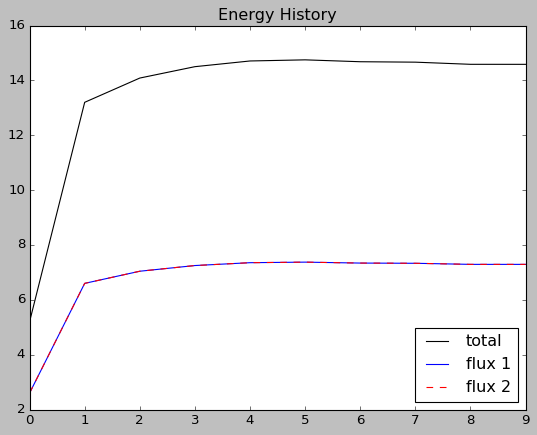

In [34]:
plt.plot(prob.energies,'k',label='total')
plt.plot(prob.energies1,'b',label='flux 1')
plt.plot(prob.energies2,'r--',label='flux 2')
plt.legend(loc=4)
plt.title("Energy History")

#### Example 3

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

In this problem we make the side wall sources asymmetric.

In [35]:
#GRID
L = 2
n,m=48,48
y=np.linspace(-L/2,L/2,n)
x=np.linspace(-L/2,L/2,m)
dx = L/(n+1)
dy = L/(m+1)
domain_len = n*m
domain_shape = (n,m)
xx,yy=np.meshgrid(x,y)

In [36]:
rho_x = np.zeros(domain_shape)
rho_x[-m//4-1:-1,-1] = -4*np.ones(m//4)
rho_x[m//6:m//3,0] = 6*np.ones(m//6)
rho_y = np.zeros(domain_shape)
rho1_xloc = np.zeros(domain_shape)
rho2_xloc = np.zeros(domain_shape)
rho1_yloc = np.zeros(domain_shape)
rho2_yloc = np.zeros(domain_shape)
rho_yloc = np.zeros(domain_shape)
rho1_xloc[:,-1] = np.ones(n)
rho2_xloc[:,0] = np.ones(n)
rho_xloc = rho1_xloc+rho2_xloc
rho_yloc[-1,1:-1] = np.ones(n-2)
gamma_loc = np.zeros(domain_shape)
gamma_loc[0,1:-1] = np.ones(n-2)
gamma = np.zeros(domain_shape)
gamma[0,3*n//8:5*n//8]=np.ones(n//4)
options={'lv':0, 'volume':.75, 'tk':.05,
         'gamma':gamma,'gamma_loc':gamma_loc,'robust':False,
         'rho_x':rho_x,'rho_xloc':rho_xloc,'rho1_xloc':rho1_xloc,'rho2_xloc':rho2_xloc,
         'rho_y':rho_y,'rho_yloc':rho_yloc,'rho1_yloc':rho1_yloc,'rho2_yloc':rho2_yloc}
prob = robustHeatLens(x,y,options)
print(rho1_yloc.shape)

(48, 48)


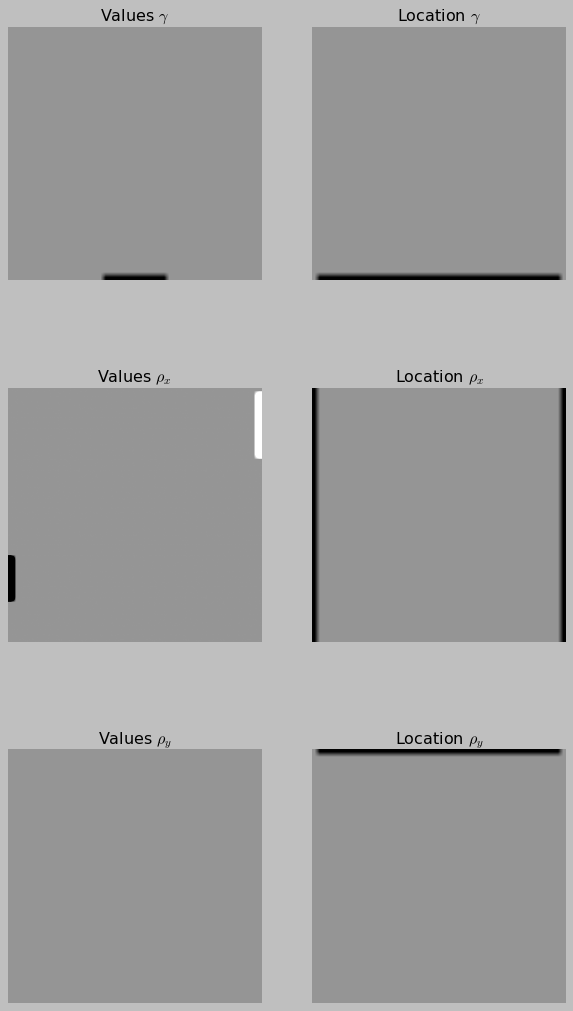

In [37]:
plt.figure(figsize=(9,16))
plt.subplot(321)
plt.title('Values $\\gamma$')
plt.imshow(prob.gamma[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(322)
plt.title('Location $\\gamma$')
plt.imshow(prob.gamma_loc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(323)
plt.title('Values $\\rho_x$')
plt.imshow(prob.rho_x[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(324)
plt.title('Location $\\rho_x$')
plt.imshow(prob.rho_xloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(325)
plt.title('Values $\\rho_y$')
plt.imshow(prob.rho_y[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(326)
plt.title('Location $\\rho_y$')
plt.imshow(prob.rho_yloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.show()

In [38]:
prob.iterate(100)

1:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                     | 62/100 [09:59<06:07,  9.67s/it]


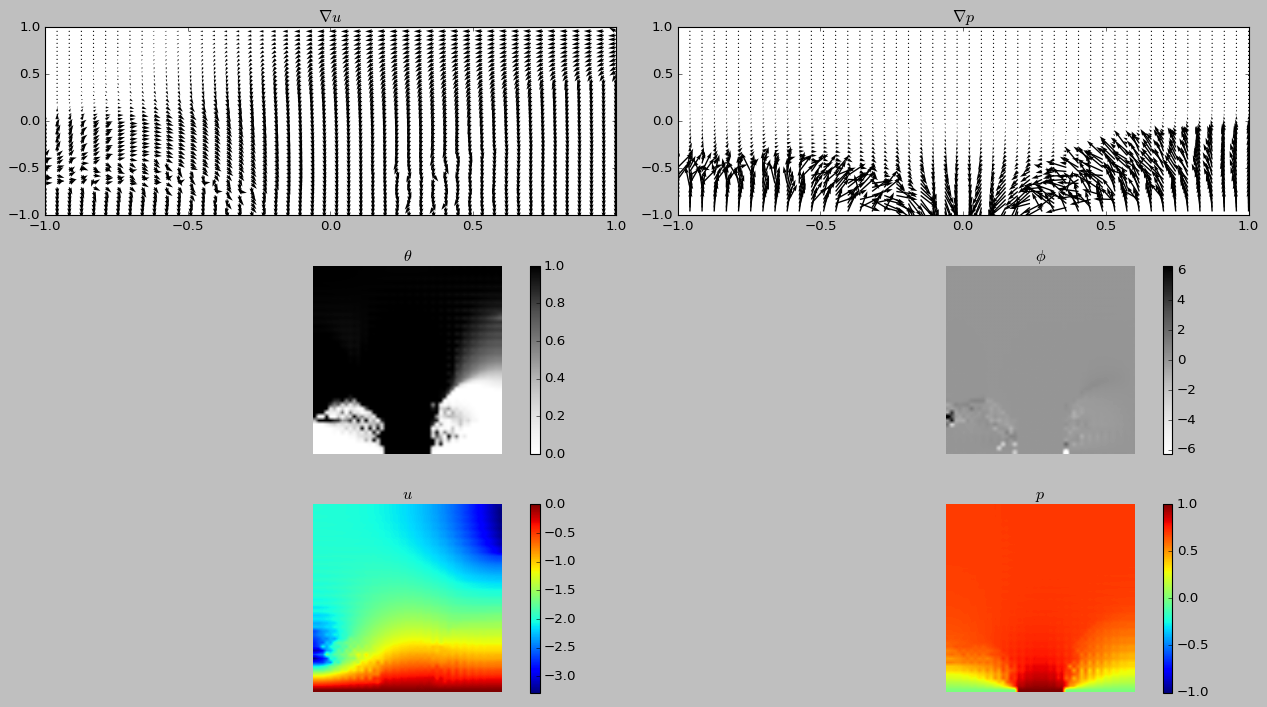

In [39]:
plt.figure(figsize=(16,9),tight_layout=True)
plt.subplot(321)
Du = np.divide(prob.Du,np.fmax(1,np.linalg.norm(prob.Du, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Du[0][1:-1],Du[1][1:-1])
plt.title('$\\nabla u$')
plt.subplot(322)
Dp = np.divide(prob.Dp,np.fmax(1,np.linalg.norm(prob.Dp, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Dp[0][1:-1],Dp[1][1:-1])
plt.title('$\\nabla p$')
plt.subplot(323)
plt.imshow(prob.theta.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=0,vmax=1)
plt.colorbar()
plt.title('$\\theta$')
plt.axis('off')
plt.subplot(324)
plt.imshow(prob.phi.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=-2*np.pi,vmax=2*np.pi)
plt.colorbar()
plt.title('$\\phi$')
plt.axis('off')
plt.subplot(325)
plt.imshow(prob.u.reshape(prob.domain_shape)[::-1])
plt.colorbar()
plt.title('$u$')
plt.axis('off')
plt.subplot(326)
plt.imshow(prob.p.reshape(prob.domain_shape)[::-1],vmin=-1,vmax=1)
plt.colorbar()
plt.title('$p$')
plt.axis('off')
plt.show()

In [40]:
print("Value of Energy Functional: {}".format(prob.energy))
print("Volume Fraction of Theta: {}".format(prob.theta_vol))

Value of Energy Functional: 61.974869719250854
Volume Fraction of Theta: 0.750079793982946


Text(0.5, 1.0, 'Energy History')

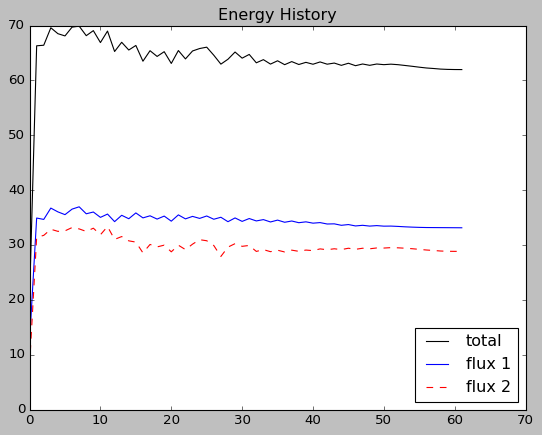

In [41]:
plt.plot(prob.energies,'k',label='total')
plt.plot(prob.energies1,'b',label='flux 1')
plt.plot(prob.energies2,'r--',label='flux 2')
plt.legend(loc=4)
plt.title("Energy History")

#### Example 3 Robust

In [42]:
#GRID
L = 2
n,m=48,48
y=np.linspace(-L/2,L/2,n)
x=np.linspace(-L/2,L/2,m)
dx = L/(n+1)
dy = L/(m+1)
domain_len = n*m
domain_shape = (n,m)
xx,yy=np.meshgrid(x,y)

In [43]:
rho_x = np.zeros(domain_shape)
rho_x[-m//4-1:-1,-1] = -4*np.ones(m//4)
rho_x[m//6:m//3,0] = 6*np.ones(m//6)
rho_y = np.zeros(domain_shape)
rho1_xloc = np.zeros(domain_shape)
rho2_xloc = np.zeros(domain_shape)
rho1_yloc = np.zeros(domain_shape)
rho2_yloc = np.zeros(domain_shape)
rho_yloc = np.zeros(domain_shape)
rho1_xloc[:,-1] = np.ones(n)
rho2_xloc[:,0] = np.ones(n)
rho_xloc = rho1_xloc+rho2_xloc
rho_yloc[-1,1:-1] = np.ones(n-2)
gamma_loc = np.zeros(domain_shape)
gamma_loc[0,1:-1] = np.ones(n-2)
gamma = np.zeros(domain_shape)
gamma[0,3*n//8:5*n//8]=np.ones(n//4)
options={'lv':0, 'volume':.75, 'tk':.05,
         'gamma':gamma,'gamma_loc':gamma_loc,
         'rho_x':rho_x,'rho_xloc':rho_xloc,'rho1_xloc':rho1_xloc,'rho2_xloc':rho2_xloc,
         'rho_y':rho_y,'rho_yloc':rho_yloc,'rho1_yloc':rho1_yloc,'rho2_yloc':rho2_yloc}
prob = robustHeatLens(x,y,options)
print(rho1_yloc.shape)

(48, 48)


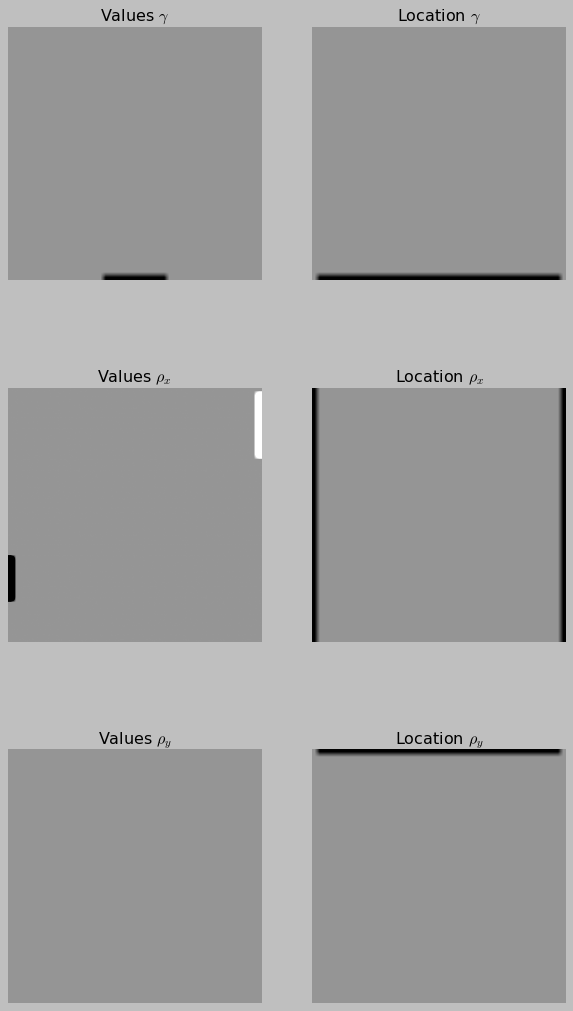

In [44]:
plt.figure(figsize=(9,16))
plt.subplot(321)
plt.title('Values $\\gamma$')
plt.imshow(prob.gamma[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(322)
plt.title('Location $\\gamma$')
plt.imshow(prob.gamma_loc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(323)
plt.title('Values $\\rho_x$')
plt.imshow(prob.rho_x[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(324)
plt.title('Location $\\rho_x$')
plt.imshow(prob.rho_xloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(325)
plt.title('Values $\\rho_y$')
plt.imshow(prob.rho_y[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(326)
plt.title('Location $\\rho_y$')
plt.imshow(prob.rho_yloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.show()

In [45]:
prob.iterate(100)

0.9964705629611439:  58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                          | 58/100 [09:11<06:39,  9.52s/it]


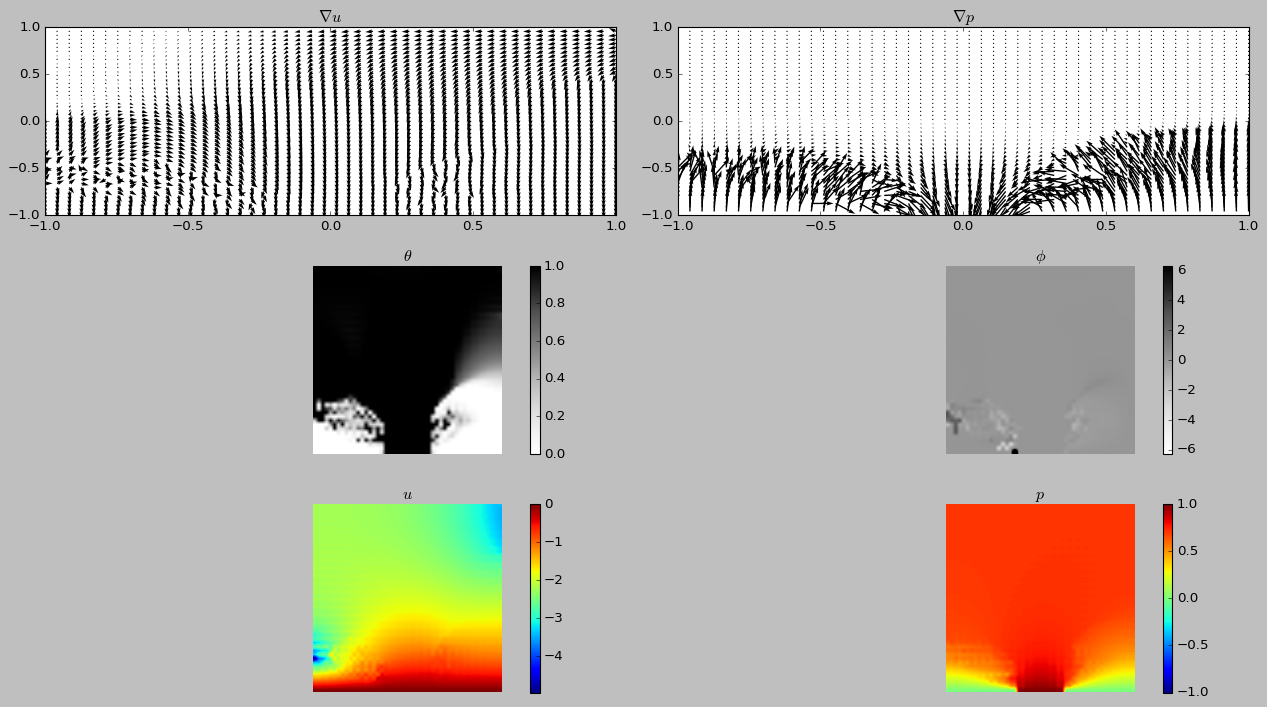

In [46]:
plt.figure(figsize=(16,9),tight_layout=True)
plt.subplot(321)
Du = np.divide(prob.Du,np.fmax(1,np.linalg.norm(prob.Du, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Du[0][1:-1],Du[1][1:-1])
plt.title('$\\nabla u$')
plt.subplot(322)
Dp = np.divide(prob.Dp,np.fmax(1,np.linalg.norm(prob.Dp, axis=0)))
plt.quiver(prob.xx[1:-1],prob.yy[1:-1],Dp[0][1:-1],Dp[1][1:-1])
plt.title('$\\nabla p$')
plt.subplot(323)
plt.imshow(prob.theta.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=0,vmax=1)
plt.colorbar()
plt.title('$\\theta$')
plt.axis('off')
plt.subplot(324)
plt.imshow(prob.phi.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=-2*np.pi,vmax=2*np.pi)
plt.colorbar()
plt.title('$\\phi$')
plt.axis('off')
plt.subplot(325)
plt.imshow(prob.u.reshape(prob.domain_shape)[::-1])
plt.colorbar()
plt.title('$u$')
plt.axis('off')
plt.subplot(326)
plt.imshow(prob.p.reshape(prob.domain_shape)[::-1],vmin=-1,vmax=1)
plt.colorbar()
plt.title('$p$')
plt.axis('off')
plt.show()

In [47]:
print("Value of Energy Functional: {}".format(prob.energy))
print("Volume Fraction of Theta: {}".format(prob.theta_vol))

Value of Energy Functional: 69.16803961939279
Volume Fraction of Theta: 0.7582891877142961


Text(0.5, 1.0, 'Energy History')

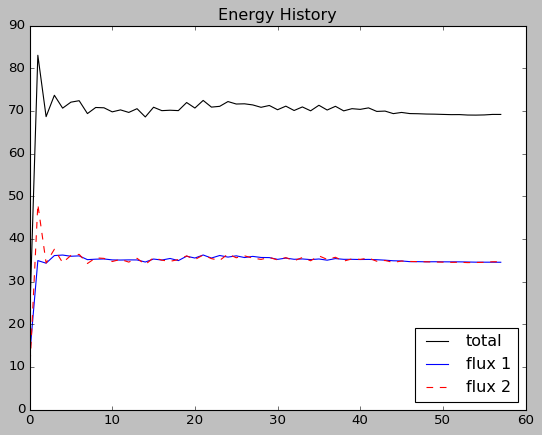

In [48]:
plt.plot(prob.energies,'k',label='total')
plt.plot(prob.energies1,'b',label='flux 1')
plt.plot(prob.energies2,'r--',label='flux 2')
plt.legend(loc=4)
plt.title("Energy History")

## Optimal Transportation

**Problem Statement**

Provided initial mass distribution $\rho$ and final mass distribution $\sigma$ over a compact metric space $X$, along with the gradient of the cost function for each point in the space $\nabla c : x\in X \rightarrow \R^+$ find the function which minimizes the following integral equation

$$\begin{align*} \min_\phi \quad & \int_X \phi(x)\left(\rho(x)-\sigma(x)\right) \\
                \text{s.t.}\quad & |\nabla \phi(x)|\leq |\nabla c(x)|,\quad \forall x\in X \end{align*}$$

In [49]:
class optimalTransport():
    def __init__(self,x,y,options={}):
        #DOMAIN
        self.m=len(x)
        self.n=len(y)
        self.dx = 1/(m+1)
        self.dy = 1/(n+1)
        self.domain_len = self.m*self.n
        self.domain_shape = (self.m,self.n)
        self.xx, self.yy = np.meshgrid(x,y)
        self.zeros = np.zeros(self.domain_shape)
        self.ones = np.ones(self.domain_shape)
        #BOUNDARIES
        self.x_loc = np.zeros(self.domain_shape);
        self.x_loc[0,:]=np.ones(m);self.x_loc[-1,:]=np.ones(m);
        self.y_loc = np.zeros(self.domain_shape);
        self.y_loc[:,0]=np.ones(n);self.y_loc[:,-1]=np.ones(n)
        self.interior = np.ones(self.domain_shape);
        self.interior[0,:]=np.zeros(m);self.interior[-1,:]=np.zeros(m);
        self.interior[:,0]=np.zeros(n);self.interior[:,-1]=np.zeros(n)
        #OPTIONS
        self.options=options
        self.check_options()
        #PRIMAL BOUNDARY DATA
        self.gamma = self.options['gamma']
        self.gamma_loc = self.options['gamma_loc']
        self.rho_x = self.options['rho_x']
        self.rho_xloc = self.options['rho_xloc']
        self.rho_y = self.options['rho_y']
        self.rho_yloc = self.options['rho_yloc']
        #INITIALIZE
        self.u=np.zeros(self.domain_len)
        self.p=np.zeros(self.domain_len)
        self.theta=np.zeros(self.domain_shape)#np.random.rand(self.domain_len).reshape(self.domain_shape)
        self.phi=np.zeros(self.domain_shape)#np.pi*np.random.rand(self.domain_len).reshape(self.domain_shape)#
        self.lv=self.options['lv']
        self.vol=self.options['volume']
        #DIFFERENCES
        self.fdf = FiniteDifferenceFunctions(self.m,self.n,self.dx,self.dy)
        self.fdm = FiniteDifferenceMatrices(self.m,self.n,self.dx,self.dy)
        self.contract = lambda a,b,c : np.einsum('ijk,ijk->jk',b,
                        np.einsum('ijkl,jkl->ikl',a,c))
        self.energies = []

    def iterate(self,k):
        pbar = tqdm(range(k))
        for _ in pbar:
            if (len(self.energies)>2) and (abs(self.energies[-1]-self.energies[-2])<.01):
                break
            self._iter()
            pbar.set_description(desc=str(self.lv))

    def _iter(self):
        #INITIALIZE
        alpha=self.options['alpha']
        beta=self.options['beta']
        tk=self.options['tk']
        #COEFFICIENTS
        A=genA(self.theta,self.phi,[self.m,self.n],alpha=alpha,beta=beta)
        self.fdm.A = A
        self.fdf.A = A
        #PRIMAL SOLUTION VIA RESIDUAL
        primal_dirichlet_loc = self.gamma_loc
        primal_neumann_xloc = self.rho_xloc
        primal_neumann_yloc = self.rho_yloc
        primal_neumann_xbc = self.rho_x
        primal_neumann_ybc = self.rho_y
        primal_dirichlet_bc = self.gamma
        primal_pde = PDESolver(self.m,self.n,self.fdm, self.interior,
                               primal_dirichlet_bc,primal_dirichlet_loc,
                               primal_neumann_xbc, primal_neumann_xloc,
                               primal_neumann_ybc, primal_neumann_yloc)
        u = primal_pde.divAgrad()
        Du = self.fdf.grad(u)     
        #SELF ADJOINT
        for i in range(self.m):
            for j in range(self.n):
                A_t=A_theta(self.theta[i,j],self.phi[i,j],alpha=alpha,beta=beta)
                rhs=self.theta[i,j]+tk*(self.lv+A_t@Du[:,i,j]@Du[:,i,j])
                self.theta[i,j]=max([0,min([1,rhs])])
        for i in range(self.m):
            for j in range(self.n):
                A_p=A_phi(self.theta[i,j],self.phi[i,j],alpha=alpha,beta=beta)
                self.phi[i,j]=self.phi[i,j]-tk*(A_p@Du[:,i,j]@Du[:,i,j])
        self.lv = max(0,self.lv - tk*(np.sum(self.theta)*(self.dx*self.dy)-self.vol))
        self.options['tk'] = .9*tk
        #SOLUTION DATA
        self.u = u
        self.Du = Du
        self.ADu=self.fdf.Agrad(u)
        self.sol=self.fdf.divAgrad(u)
        self.energy = np.sum((-self.ADu[0]*self.y_loc-self.ADu[1]*self.x_loc))
        self.theta_vol = np.sum(self.theta*(self.dx*self.dy))
        self.energies += [self.energy]

    def check_options(self):
        assert ('gamma' in self.options) and ('gamma_loc' in self.options), 'No Dirichlet Conditions Provided.'
        assert ('rho_x' in self.options) or ('rho_y' in self.options), 'No Sources Provided.'
        if not('alpha' in self.options):
            self.options['alpha']=1
        if not('beta' in self.options):
            self.options['beta']=.1
        if not('tk' in self.options):
            self.options['tk']=.1
        if not('lv' in self.options):
            self.options['lv']=0
        if not('volume' in self.options):
            self.options['volume']=.5

### Example 1: Split Plates

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

In this example we consider the transportation problem between symmetrized source and sink on opposite boundaries with zero-flux side walls.

In [50]:
#GRID
L = 2
n,m=40,40
y=np.linspace(-L/2,L/2,n)
x=np.linspace(-L/2,L/2,m)
dx = L/(n+1)
dy = L/(m+1)
domain_len = n*m
domain_shape = (n,m)
xx,yy=np.meshgrid(x,y)

In [51]:
rho_y = np.zeros(domain_shape)
rho_y[-1,n//4:3*n//4] = np.ones(n//2)
rho_y[0,n//4:3*n//4] = np.ones(n//2)
rho_x = np.zeros(domain_shape)
rho_xloc = np.zeros(domain_shape)
rho_xloc[1:-1,-1] = np.ones(n-2)
rho_xloc[1:-1,0] = np.ones(n-2)
rho_yloc = np.zeros(domain_shape)
rho_yloc[-1,:] = np.ones(n)
rho_yloc[0,:] = np.ones(n)
gamma_loc = np.zeros(domain_shape)
# gamma_loc[1:-1,0] = np.ones(n-2)
# gamma_loc[1:-1,-1] = np.ones(n-2)
gamma = np.zeros(domain_shape)
options={'lv':0, 'volume':.2, 'tk':.1,
         'gamma':gamma,'gamma_loc':gamma_loc,
         'rho_x':rho_x,'rho_xloc':rho_xloc,
         'rho_y':rho_y,'rho_yloc':rho_yloc}
prob = optimalTransport(x,y,options)

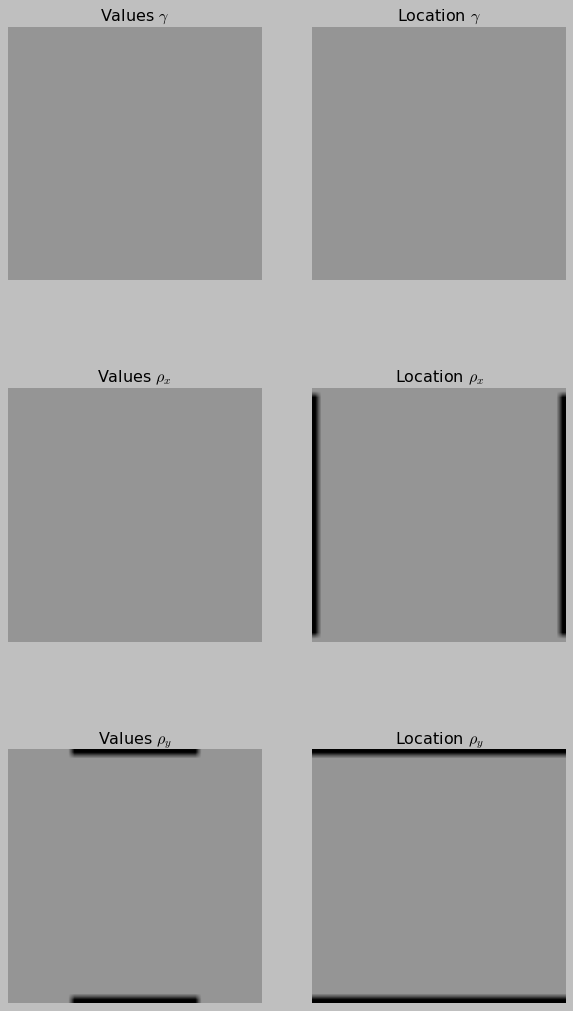

In [52]:
plt.figure(figsize=(9,16))
plt.subplot(321)
plt.title('Values $\\gamma$')
plt.imshow(prob.gamma[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(322)
plt.title('Location $\\gamma$')
plt.imshow(prob.gamma_loc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(323)
plt.title('Values $\\rho_x$')
plt.imshow(prob.rho_x[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(324)
plt.title('Location $\\rho_x$')
plt.imshow(prob.rho_xloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(325)
plt.title('Values $\\rho_y$')
plt.imshow(prob.rho_y[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(326)
plt.title('Location $\\rho_y$')
plt.imshow(prob.rho_yloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.show()

In [53]:
prob.iterate(10)

0:  30%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                                         | 3/10 [00:03<00:07,  1.10s/it]


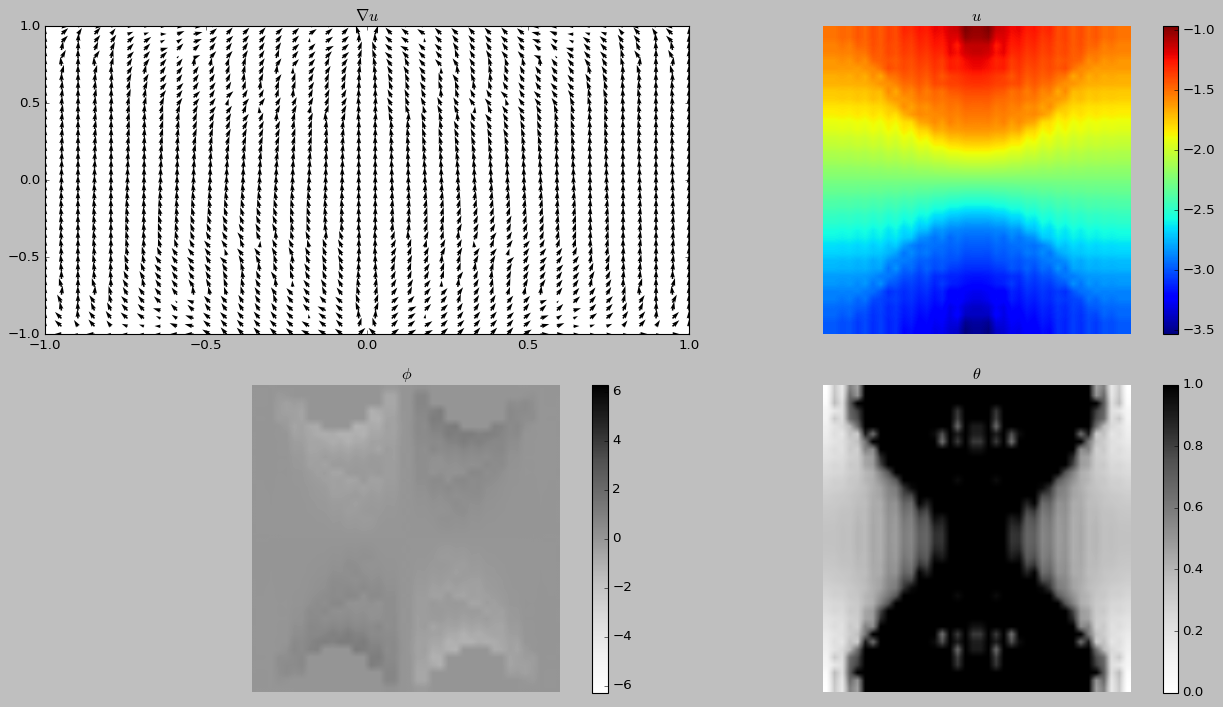

In [54]:
plt.figure(figsize=(16,9),tight_layout=True)
plt.subplot(221)
Du = np.divide(prob.Du,np.fmax(1,np.linalg.norm(prob.Du, axis=0)))
plt.quiver(prob.xx,prob.yy,Du[0],Du[1])
plt.title('$\\nabla u$')
plt.subplot(222)
plt.imshow(prob.u.reshape(prob.domain_shape)[::-1])
plt.colorbar()
plt.title('$u$')
plt.axis('off')
plt.subplot(223)
plt.imshow(prob.phi.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=-2*np.pi,vmax=2*np.pi)
plt.colorbar()
plt.title('$\\phi$')
plt.axis('off')
plt.subplot(224)
plt.imshow(prob.theta.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=0,vmax=1)
plt.colorbar()
plt.title('$\\theta$')
plt.axis('off')
plt.show()

In [55]:
print("Value of Energy Functional: {}".format(prob.energy))
print("Volume Fraction of Theta: {}".format(prob.theta_vol))

Value of Energy Functional: -39.99999999999976
Volume Fraction of Theta: 0.7021171486158976


Text(0.5, 1.0, 'Energy History')

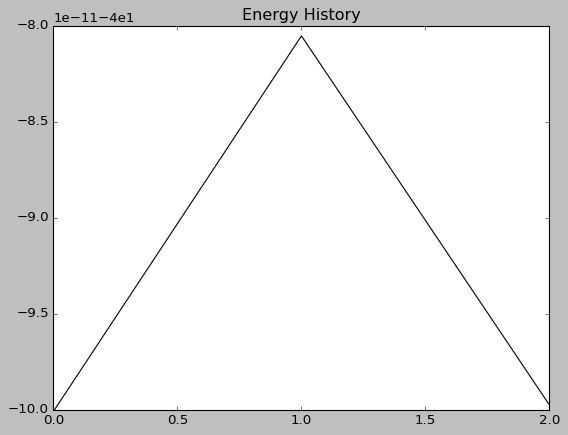

In [56]:
plt.plot(prob.energies,'k')
plt.title("Energy History")

### Example 2: Separated Plates

<a href="#Numerical-Methods-for-Homogenization" class="top-ref">[top]</a>

In this example we consider the transportation problem between symmetrized source and sink on opposite boundaries with zero-flux side walls.

In [57]:
#GRID
L = 2
n,m=40,40
y=np.linspace(-L/2,L/2,n)
x=np.linspace(-L/2,L/2,m)
dx = L/(n+1)
dy = L/(m+1)
domain_len = n*m
domain_shape = (n,m)
xx,yy=np.meshgrid(x,y)

In [58]:
rho_y = np.zeros(domain_shape)
rho_y[-1,-n//4:] = np.ones(n//4)
rho_y[-1,:n//4] = np.ones(n//4)
rho_y[0,n//4:3*n//4] = np.ones(n//2)
rho_x = np.zeros(domain_shape)
rho_xloc = np.zeros(domain_shape)
rho_xloc[1:-1,-1] = np.ones(n-2)
rho_xloc[1:-1,0] = np.ones(n-2)
rho_yloc = np.zeros(domain_shape)
rho_yloc[-1,:] = np.ones(n)
rho_yloc[0,:] = np.ones(n)
gamma_loc = np.zeros(domain_shape)
# gamma_loc[1:-1,0] = np.ones(n-2)
# gamma_loc[1:-1,-1] = np.ones(n-2)
gamma = np.zeros(domain_shape)
options={'lv':0, 'volume':.2, 'tk':.1,
         'gamma':gamma,'gamma_loc':gamma_loc,
         'rho_x':rho_x,'rho_xloc':rho_xloc,
         'rho_y':rho_y,'rho_yloc':rho_yloc}
prob = optimalTransport(x,y,options)

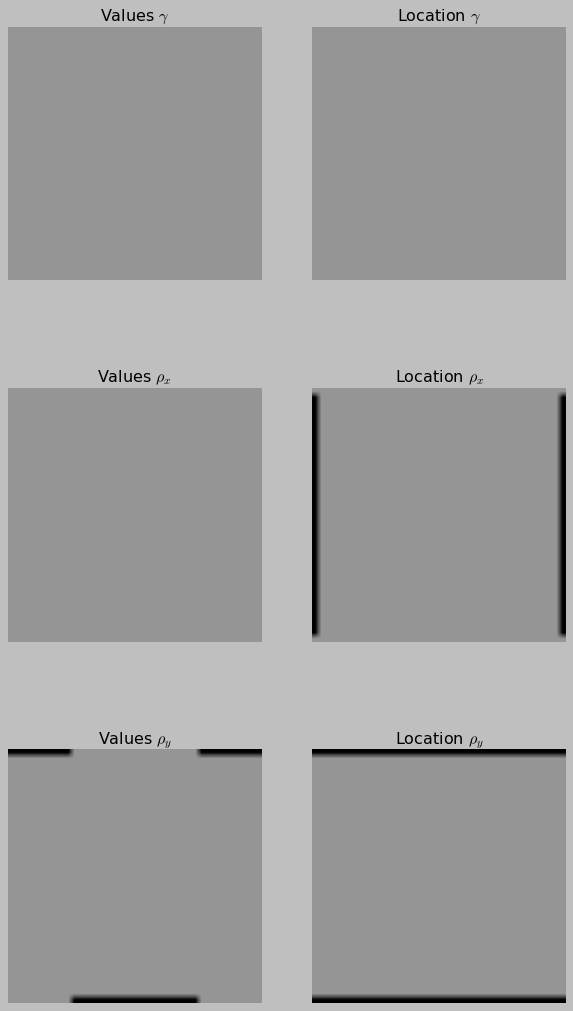

In [59]:
plt.figure(figsize=(9,16))
plt.subplot(321)
plt.title('Values $\\gamma$')
plt.imshow(prob.gamma[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(322)
plt.title('Location $\\gamma$')
plt.imshow(prob.gamma_loc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(323)
plt.title('Values $\\rho_x$')
plt.imshow(prob.rho_x[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(324)
plt.title('Location $\\rho_x$')
plt.imshow(prob.rho_xloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(325)
plt.title('Values $\\rho_y$')
plt.imshow(prob.rho_y[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.subplot(326)
plt.title('Location $\\rho_y$')
plt.imshow(prob.rho_yloc[::-1],cmap='Greys',vmin=-1,vmax=1)
plt.axis('off')
plt.show()

In [60]:
prob.iterate(10)

0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.05s/it]


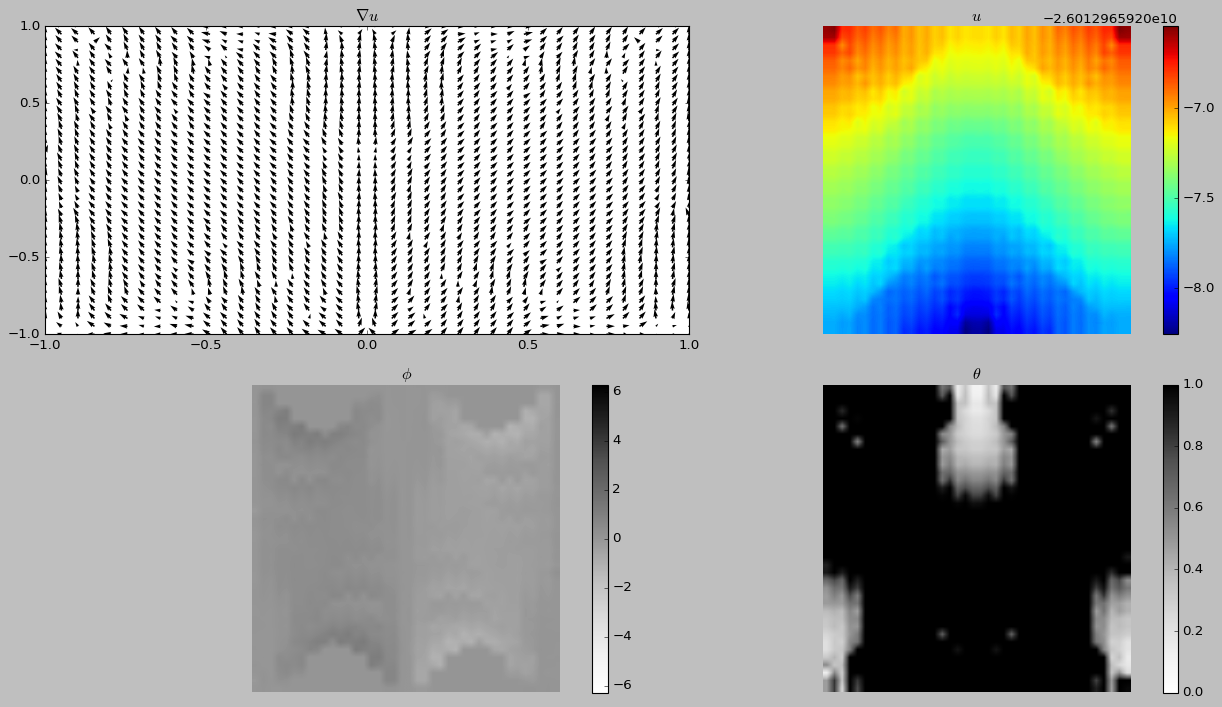

In [61]:
plt.figure(figsize=(16,9),tight_layout=True)
plt.subplot(221)
Du = np.divide(prob.Du,np.fmax(1,np.linalg.norm(prob.Du, axis=0)))
plt.quiver(prob.xx,prob.yy,Du[0],Du[1])
plt.title('$\\nabla u$')
plt.subplot(222)
plt.imshow(prob.u.reshape(prob.domain_shape)[::-1])
plt.colorbar()
plt.title('$u$')
plt.axis('off')
plt.subplot(223)
plt.imshow(prob.phi.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=-2*np.pi,vmax=2*np.pi)
plt.colorbar()
plt.title('$\\phi$')
plt.axis('off')
plt.subplot(224)
plt.imshow(prob.theta.reshape(prob.domain_shape)[::-1],cmap='Greys',vmin=0,vmax=1)
plt.colorbar()
plt.title('$\\theta$')
plt.axis('off')
plt.show()

In [62]:
print("Value of Energy Functional: {}".format(prob.energy))
print("Volume Fraction of Theta: {}".format(prob.theta_vol))

Value of Energy Functional: -39.58572321831948
Volume Fraction of Theta: 0.8701007344186236


Text(0.5, 1.0, 'Energy History')

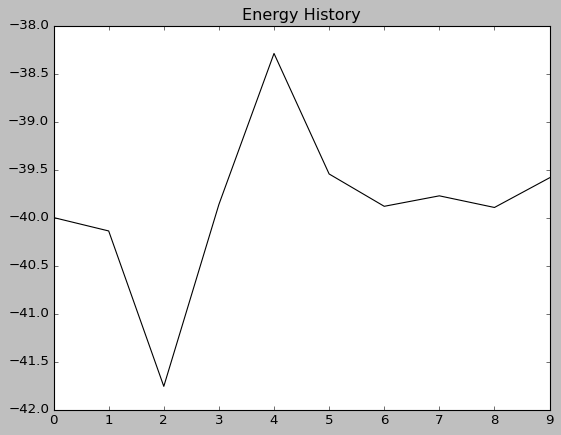

In [63]:
plt.plot(prob.energies,'k')
plt.title("Energy History")

## References